<a href="https://colab.research.google.com/github/saugata-malakar/ML-CaPsule/blob/master/Untitled80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the data
test_data = pd.read_csv('/content/test.csv')
test_demo = pd.read_csv('/content/test_demographics.csv')

# Show basic info
print("Test Data:")
print(test_data.info())
print(test_data.head())

print("\nTest Demographics:")
print(test_demo.info())
print(test_demo.head())

# Check unique gesture labels (if available)
if 'gesture' in test_data.columns:
    print("Unique Gestures in Test Data:", test_data['gesture'].unique())

# Check sensor columns
sensor_cols = [col for col in test_data.columns if col not in ['sequence_id', 'timestamp', 'gesture']]
print("\nSensor columns:", sensor_cols)


Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Columns: 336 entries, row_id to tof_5_v63
dtypes: float64(332), int64(1), object(3)
memory usage: 281.0+ KB
None
              row_id sequence_id  sequence_counter      subject      acc_x  \
0  SEQ_000001_000000  SEQ_000001                 0  SUBJ_055840   9.039062   
1  SEQ_000001_000001  SEQ_000001                 1  SUBJ_055840   9.421875   
2  SEQ_000001_000002  SEQ_000001                 2  SUBJ_055840  10.160156   
3  SEQ_000001_000003  SEQ_000001                 3  SUBJ_055840   9.773438   
4  SEQ_000001_000004  SEQ_000001                 4  SUBJ_055840   9.195312   

      acc_y     acc_z     rot_w     rot_x     rot_y  ...  tof_5_v54  \
0  5.261719  0.800781  0.367188 -0.397400 -0.629028  ...       97.0   
1  3.460938 -1.113281  0.353882 -0.507141 -0.652710  ...      175.0   
2  2.082031 -3.871094  0.384094 -0.532104 -0.639648  ...       -1.0   
3  1.355469 -4.371094  0.387756 -0.531982 -0.634033

Total sequences: 2
Total rows: 107

Rows per sequence (summary):
count     2.000000
mean     53.500000
std       3.535534
min      51.000000
25%      52.250000
50%      53.500000
75%      54.750000
max      56.000000
dtype: float64

Top 10 features with most missing values:
tof_5_v47    0.0
tof_5_v46    0.0
tof_5_v45    0.0
tof_5_v44    0.0
tof_5_v43    0.0
tof_5_v42    0.0
tof_5_v41    0.0
tof_5_v40    0.0
tof_5_v39    0.0
tof_5_v38    0.0
dtype: float64

IMU Columns: ['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z']
Thermopile Columns: 5
ToF Columns: 320


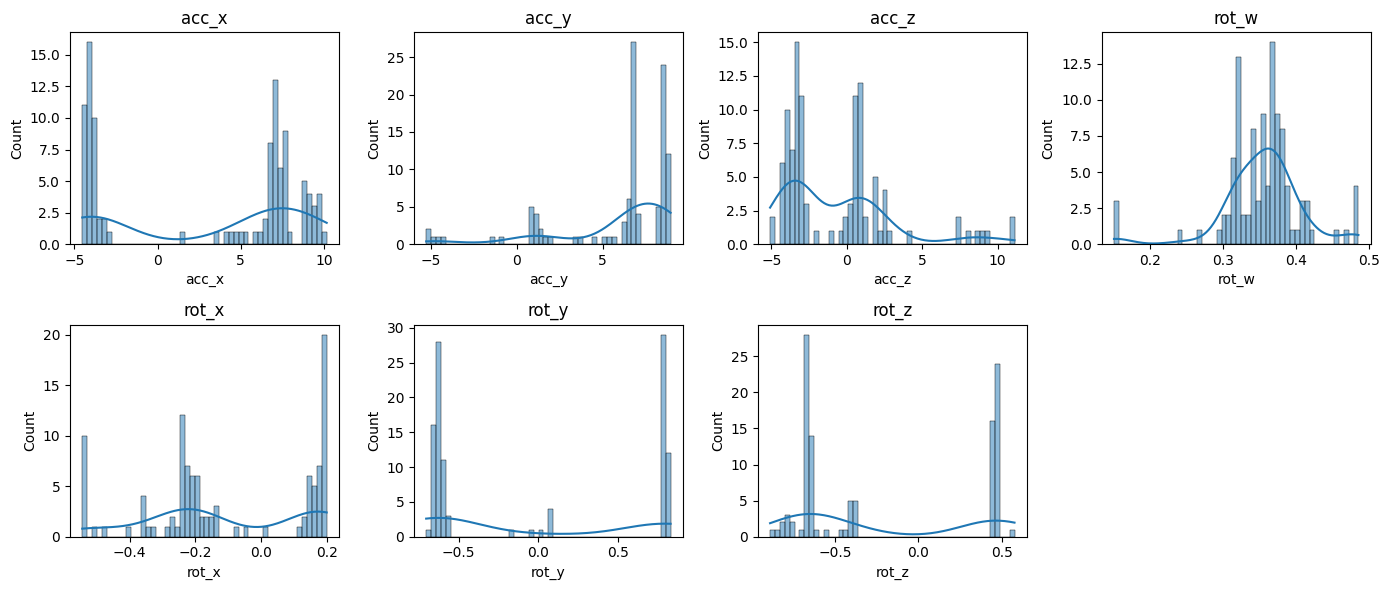

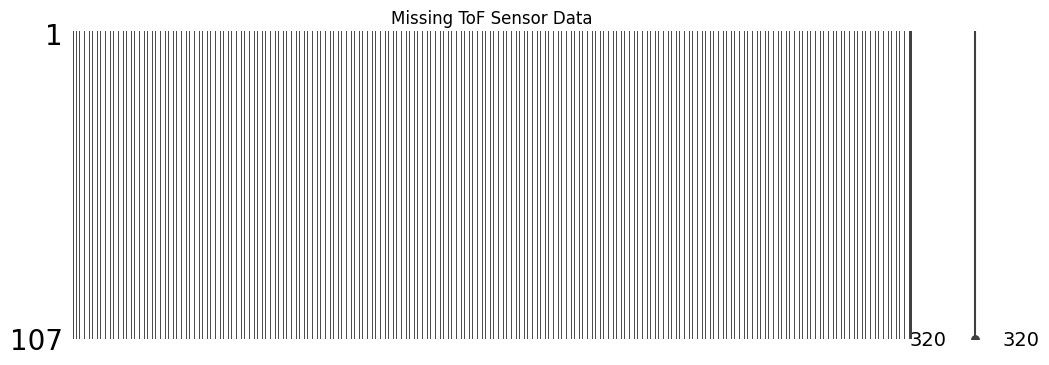

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

# --- Basic info ---
print(f"Total sequences: {test_data['sequence_id'].nunique()}")
print(f"Total rows: {len(test_data)}")
print("\nRows per sequence (summary):")
print(test_data.groupby('sequence_id').size().describe())

# --- Check missing values ---
missing_summary = test_data.isnull().mean().sort_values(ascending=False)
print("\nTop 10 features with most missing values:")
print(missing_summary.head(10))

# --- Sensor column types ---
imu_cols = [col for col in test_data.columns if col.startswith("acc_") or col.startswith("rot_")]
thm_cols = [col for col in test_data.columns if col.startswith("thm_")]
tof_cols = [col for col in test_data.columns if col.startswith("tof_")]

print(f"\nIMU Columns: {imu_cols}")
print(f"Thermopile Columns: {len(thm_cols)}")
print(f"ToF Columns: {len(tof_cols)}")

# --- Distribution plots (IMU example) ---
plt.figure(figsize=(14, 6))
for i, col in enumerate(imu_cols):
    plt.subplot(2, 4, i+1)
    sns.histplot(test_data[col].dropna(), bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# --- Missing data matrix (ToF) ---
# missingno is already imported at the beginning of the cell
# import missingno as msno
# Use all rows instead of sampling more than available
msno.matrix(test_data[tof_cols], figsize=(12, 4)) # Removed .sample(500)
plt.title("Missing ToF Sensor Data")
plt.show()

Total sequences: 2
Total rows: 107

Rows per sequence (summary):
count     2.000000
mean     53.500000
std       3.535534
min      51.000000
25%      52.250000
50%      53.500000
75%      54.750000
max      56.000000
dtype: float64

Top 10 features with most missing values:
tof_5_v47    0.0
tof_5_v46    0.0
tof_5_v45    0.0
tof_5_v44    0.0
tof_5_v43    0.0
tof_5_v42    0.0
tof_5_v41    0.0
tof_5_v40    0.0
tof_5_v39    0.0
tof_5_v38    0.0
dtype: float64

IMU Columns: ['acc_x', 'acc_y', 'acc_z', 'rot_w', 'rot_x', 'rot_y', 'rot_z']
Thermopile Columns: 5
ToF Columns: 320


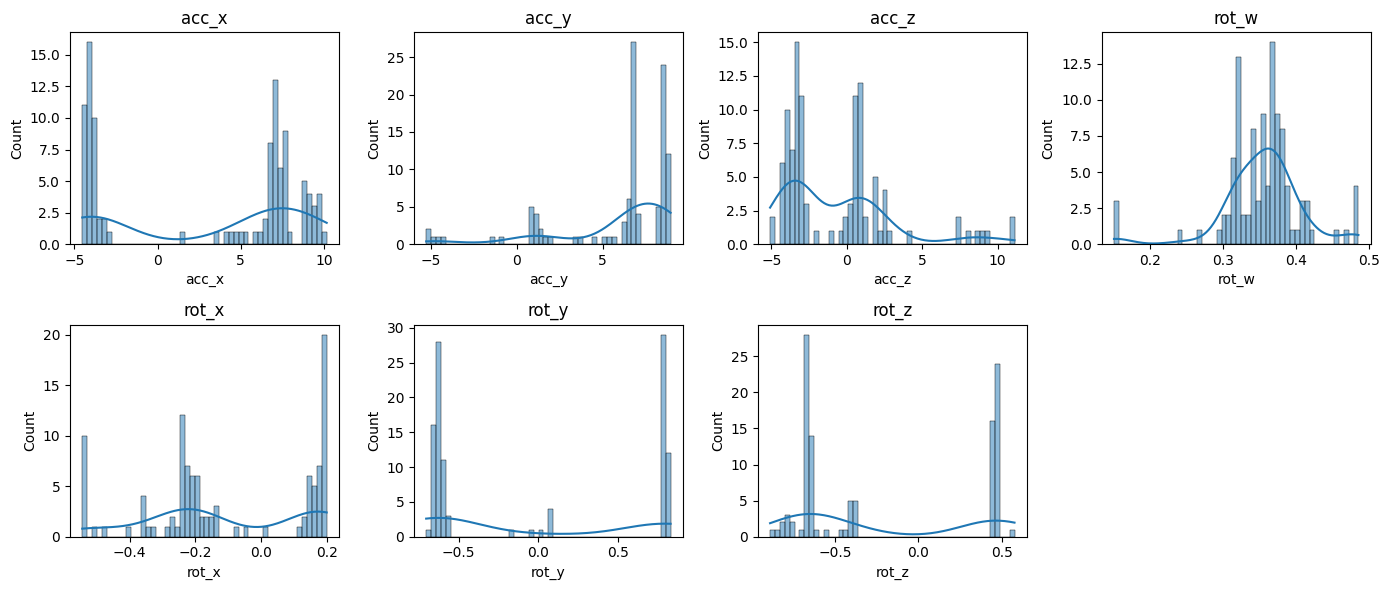

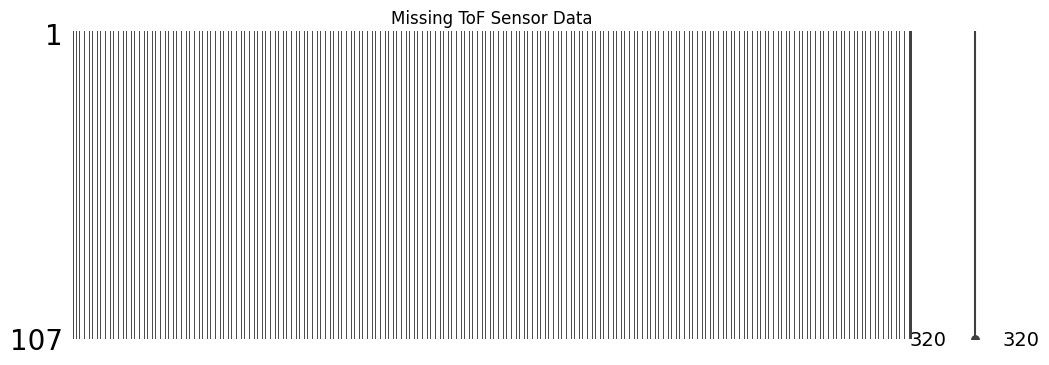

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

# --- Basic info ---
print(f"Total sequences: {test_data['sequence_id'].nunique()}")
print(f"Total rows: {len(test_data)}")
print("\nRows per sequence (summary):")
print(test_data.groupby('sequence_id').size().describe())

# --- Check missing values ---
missing_summary = test_data.isnull().mean().sort_values(ascending=False)
print("\nTop 10 features with most missing values:")
print(missing_summary.head(10))

# --- Sensor column types ---
imu_cols = [col for col in test_data.columns if col.startswith("acc_") or col.startswith("rot_")]
thm_cols = [col for col in test_data.columns if col.startswith("thm_")]
tof_cols = [col for col in test_data.columns if col.startswith("tof_")]

print(f"\nIMU Columns: {imu_cols}")
print(f"Thermopile Columns: {len(thm_cols)}")
print(f"ToF Columns: {len(tof_cols)}")

# --- Distribution plots (IMU example) ---
plt.figure(figsize=(14, 6))
for i, col in enumerate(imu_cols):
    plt.subplot(2, 4, i+1)
    sns.histplot(test_data[col].dropna(), bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# --- Missing data matrix (ToF) ---
# missingno is already imported at the beginning of the cell
# import missingno as msno
# Use all rows instead of sampling more than available
msno.matrix(test_data[tof_cols], figsize=(12, 4)) # Removed .sample(500)
plt.title("Missing ToF Sensor Data")
plt.show()

In [11]:
# Count missing values
missing_counts = test_data.isnull().sum().sort_values(ascending=False)
missing_summary = missing_counts[missing_counts > 0]
print("\nMissing Data Columns:\n", missing_summary)

# Number of sequences
num_sequences = test_data['sequence_id'].nunique()
print(f"\nUnique Sequences in Test: {num_sequences}")


Missing Data Columns:
 Series([], dtype: int64)

Unique Sequences in Test: 2


In [13]:
imu_cols = [col for col in test_data.columns if col.startswith(('acc_', 'rot_'))]
thm_cols = [col for col in test_data.columns if col.startswith('thm_')]
tof_cols = [col for col in test_data.columns if col.startswith('tof_')]

print("\n# of IMU columns:", len(imu_cols))
print("# of Thermopile columns:", len(thm_cols))
print("# of TOF columns:", len(tof_cols))


# of IMU columns: 7
# of Thermopile columns: 5
# of TOF columns: 320


In [16]:
import numpy as np

# Replace -1 with NaN in TOF
# Changed 'test' to 'test_data'
test_data[tof_cols] = test_data[tof_cols].replace(-1, np.nan)

# Count NaNs after replacement
tof_nans = test_data[tof_cols].isnull().sum().sum()
print(f"\nTotal NaNs in TOF after replacement: {tof_nans}")


Total NaNs in TOF after replacement: 20897


In [17]:
# Merge demographics into test set
test_data = test_data.merge(test_demo, on='subject', how='left')

print("\nMerged Test Data Sample:\n", test_data[['subject', 'age', 'sex', 'handedness', 'height_cm']].head())


Merged Test Data Sample:
        subject  age  sex  handedness  height_cm
0  SUBJ_055840   13    0           1      177.0
1  SUBJ_055840   13    0           1      177.0
2  SUBJ_055840   13    0           1      177.0
3  SUBJ_055840   13    0           1      177.0
4  SUBJ_055840   13    0           1      177.0


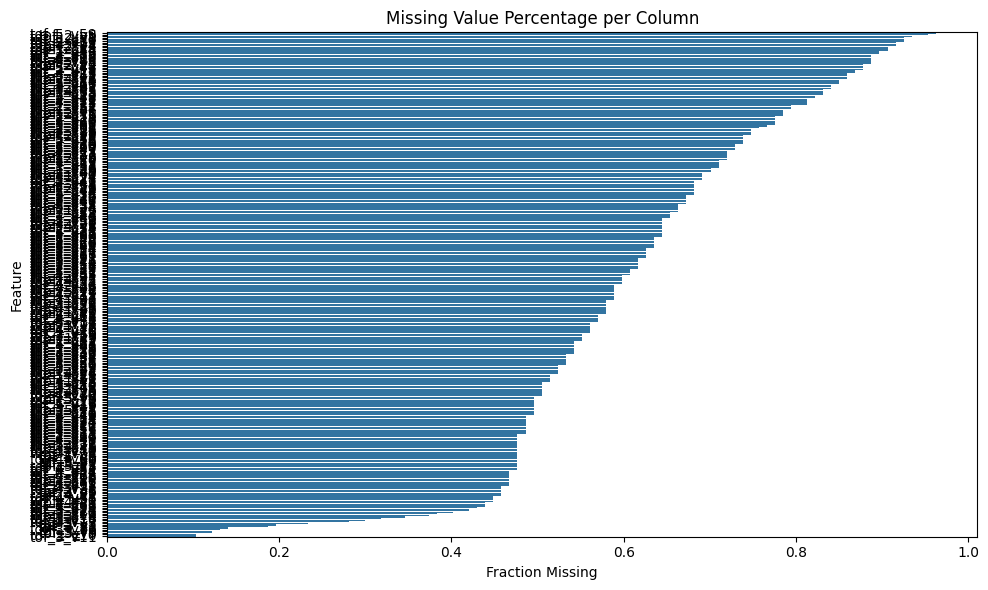

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# % missing values per column
missing_pct = test_data.isnull().mean().sort_values(ascending=False)
missing_pct = missing_pct[missing_pct > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_pct.values, y=missing_pct.index)
plt.title("Missing Value Percentage per Column")
plt.xlabel("Fraction Missing")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


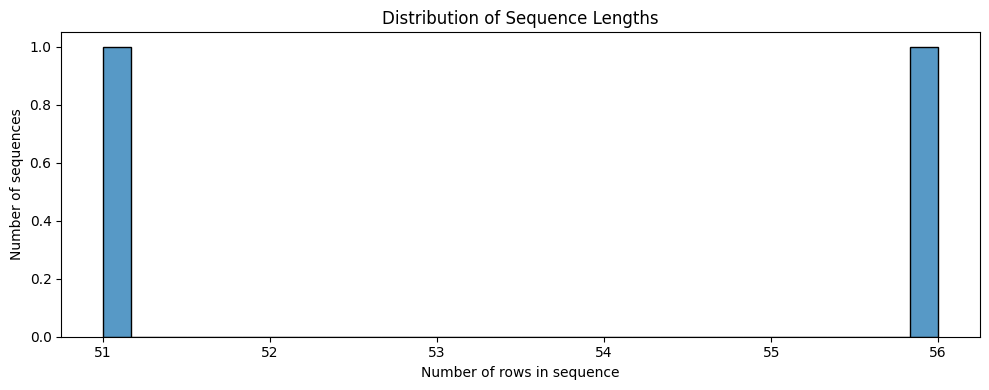

In [19]:
sequence_lengths = test_data.groupby("sequence_id").size()

plt.figure(figsize=(10, 4))
sns.histplot(sequence_lengths, bins=30, kde=False)
plt.title("Distribution of Sequence Lengths")
plt.xlabel("Number of rows in sequence")
plt.ylabel("Number of sequences")
plt.tight_layout()
plt.show()


In [20]:
imu_cols = [col for col in test_data.columns if col.startswith("acc") or col.startswith("rot")]

test_data[imu_cols].describe().T[['mean', 'std', 'min', 'max']].sort_values(by='std', ascending=False).head(10)


mean       std       min        max
acc_x  2.901249  5.703883 -4.523438  10.160156
acc_z -0.696116  3.636473 -5.093750  11.113281
acc_y  5.978899  3.506251 -5.257812   8.957031
rot_y -0.042413  0.681530 -0.703430   0.827820
rot_z -0.210948  0.544197 -0.887878   0.575623
rot_x -0.104678  0.246390 -0.544495   0.199585
rot_w  0.355116  0.054754  0.150818   0.485718

from matplotlib import pyplot as plt
_df_0['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['max'].plot(kind='hist', bins=20, title='max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='min', y='max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['max'].plot(kind='line', figsize=(8, 4), title='max')
plt.gca().spines[['top', 'right']].set_visible(False)

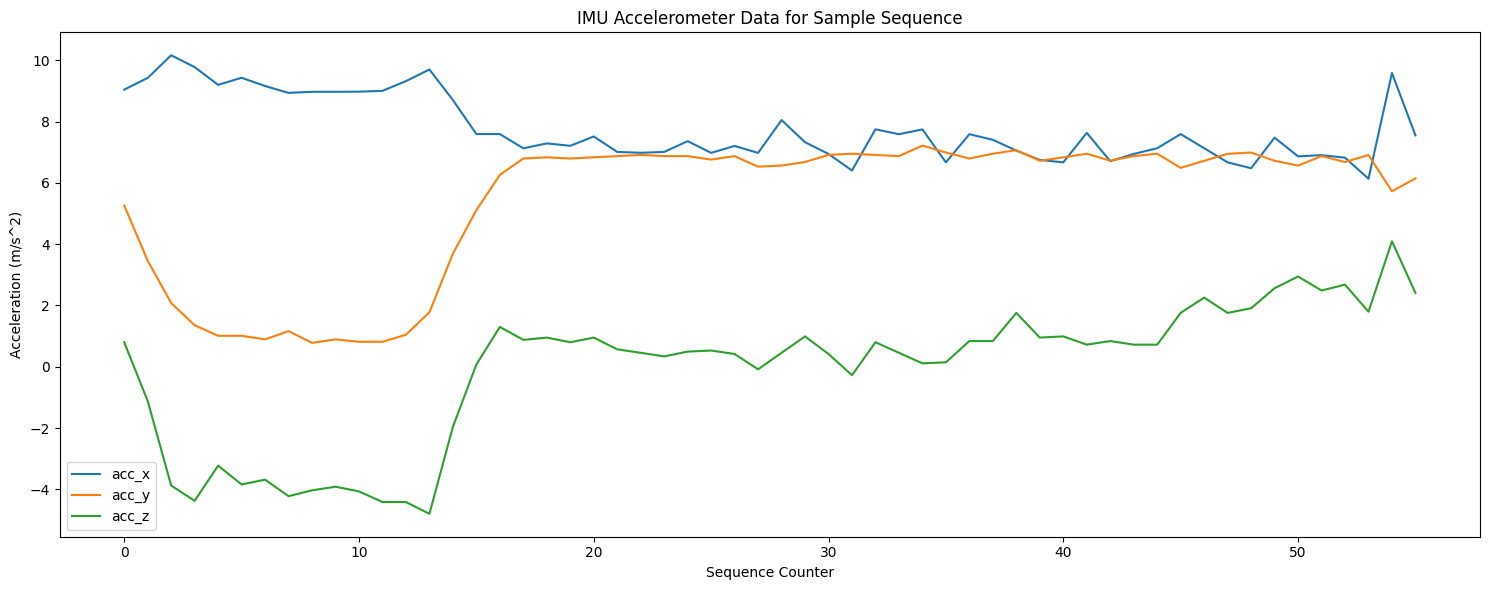

In [21]:
# Pick a sequence with complete IMU data
sample_seq = test_data[test_data['sequence_id'] == test_data['sequence_id'].unique()[0]]

plt.figure(figsize=(15, 6))
for i, col in enumerate(['acc_x', 'acc_y', 'acc_z']):
    plt.plot(sample_seq['sequence_counter'], sample_seq[col], label=col)
plt.title("IMU Accelerometer Data for Sample Sequence")
plt.xlabel("Sequence Counter")
plt.ylabel("Acceleration (m/s^2)")
plt.legend()
plt.tight_layout()
plt.show()


In [22]:
thm_cols = [col for col in test_data.columns if col.startswith("thm")]
test_data[thm_cols].describe().T[['mean', 'std', 'min', 'max']]


mean       std        min        max
thm_1  27.338558  3.228110  23.668732  31.404631
thm_2  28.193463  3.781842  23.831026  33.143929
thm_3  27.556101  2.653628  23.956018  32.595078
thm_4  29.049820  4.562578  23.922821  33.648617
thm_5  27.290103  2.999997  23.681103  31.459490

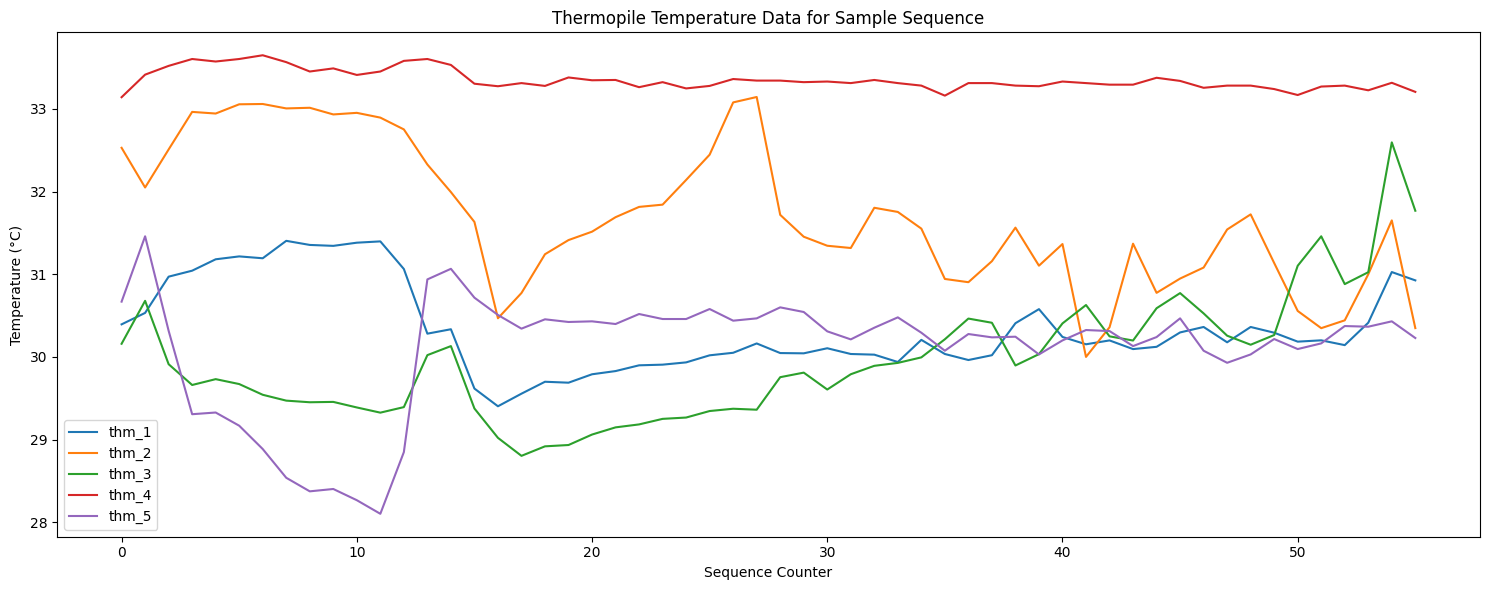

In [23]:
plt.figure(figsize=(15, 6))
for col in thm_cols:
    plt.plot(sample_seq['sequence_counter'], sample_seq[col], label=col)
plt.title("Thermopile Temperature Data for Sample Sequence")
plt.xlabel("Sequence Counter")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.tight_layout()
plt.show()


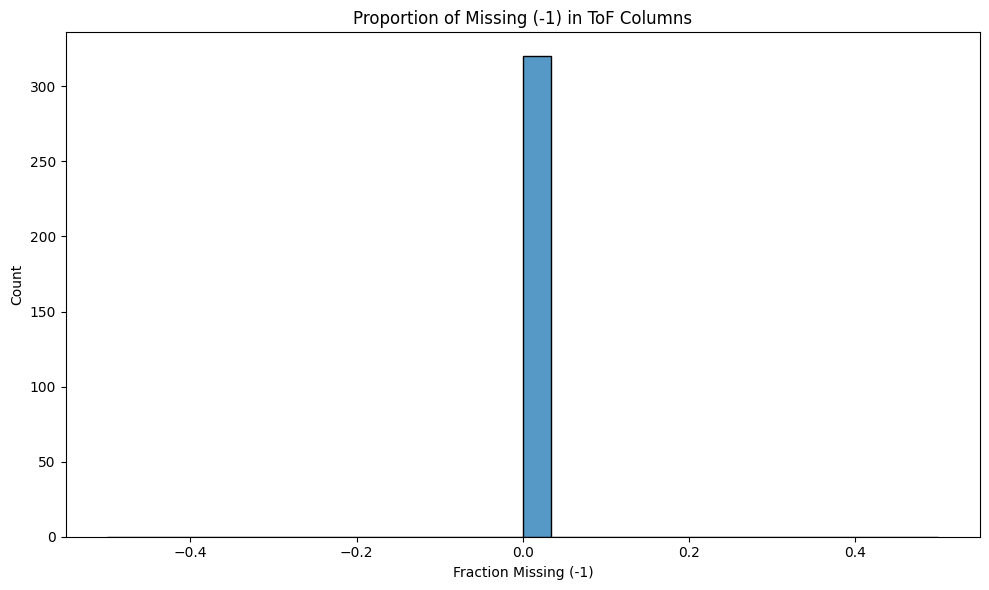

In [24]:
tof_cols = [col for col in test_data.columns if col.startswith("tof")]

# Check proportion of -1 values (invalid readings)
tof_missing = (test_data[tof_cols] == -1).mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.histplot(tof_missing, bins=30)
plt.title("Proportion of Missing (-1) in ToF Columns")
plt.xlabel("Fraction Missing (-1)")
plt.tight_layout()
plt.show()


In [25]:
test_data[tof_cols] = test_data[tof_cols].replace(-1, pd.NA)


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
test_data[imu_cols + thm_cols] = scaler.fit_transform(test_data[imu_cols + thm_cols])


In [27]:
test_data = test_data.merge(test_demo, on='subject', how='left')


In [28]:
import numpy as np

# Group by sequence_id and compute statistical features
def generate_sequence_features(df, cols):
    aggs = ['mean', 'std', 'min', 'max', 'median', 'skew']
    agg_df = df.groupby('sequence_id')[cols].agg(aggs)
    agg_df.columns = ['_'.join(col).strip() for col in agg_df.columns.values]
    return agg_df.reset_index()

# Define sensor columns
sensor_cols = imu_cols + thm_cols + tof_cols

# Replace -1 in ToF with np.nan before aggregation
test_data[tof_cols] = test_data[tof_cols].replace(-1, np.nan)

# Generate features
seq_features = generate_sequence_features(test_data, sensor_cols)


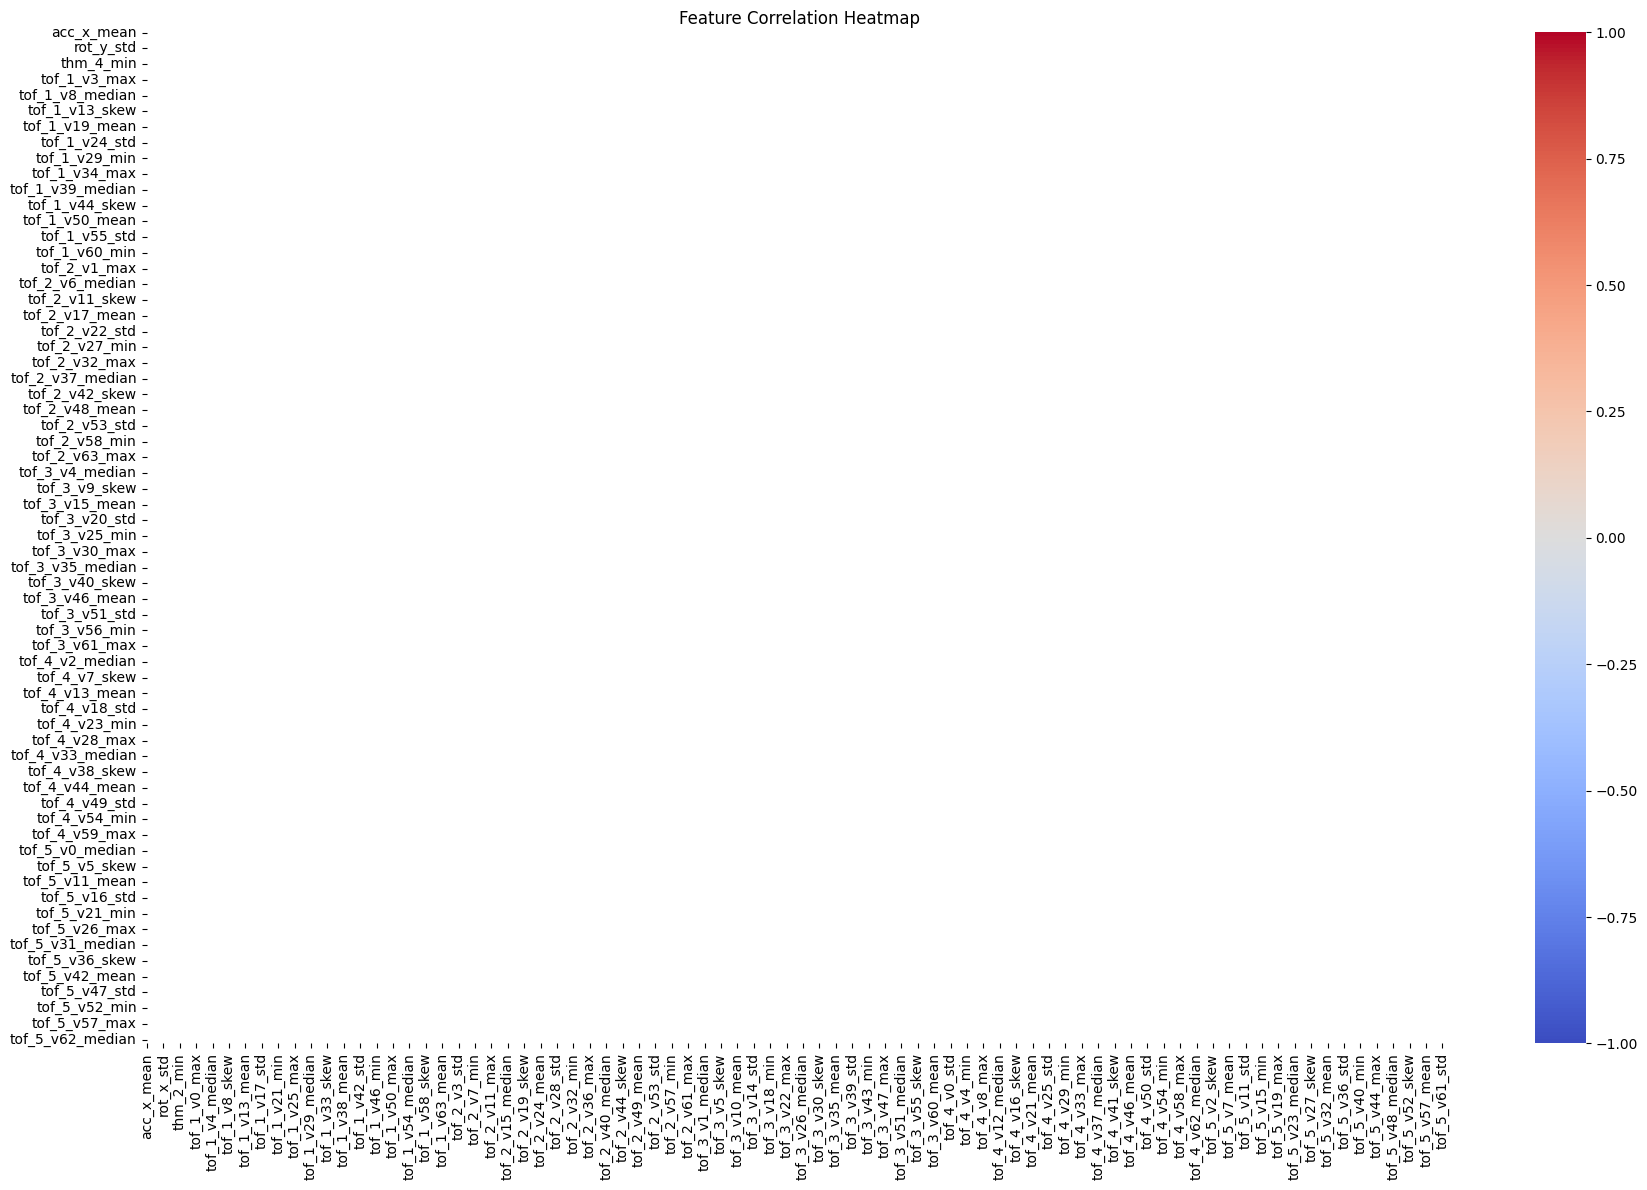

In [29]:
plt.figure(figsize=(18, 12))
corr = seq_features.drop(columns='sequence_id').corr()

sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.2)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


In [32]:
# Merge demographics into test set
test_data = test_data.merge(test_demo, on='subject', how='left')

print("\nMerged Test Data Sample:\n", test_data[['subject', 'age', 'sex', 'handedness', 'height_cm']].head())


Merged Test Data Sample:
        subject  age  sex  handedness  height_cm
0  SUBJ_055840   13    0           1      177.0
1  SUBJ_055840   13    0           1      177.0
2  SUBJ_055840   13    0           1      177.0
3  SUBJ_055840   13    0           1      177.0
4  SUBJ_055840   13    0           1      177.0


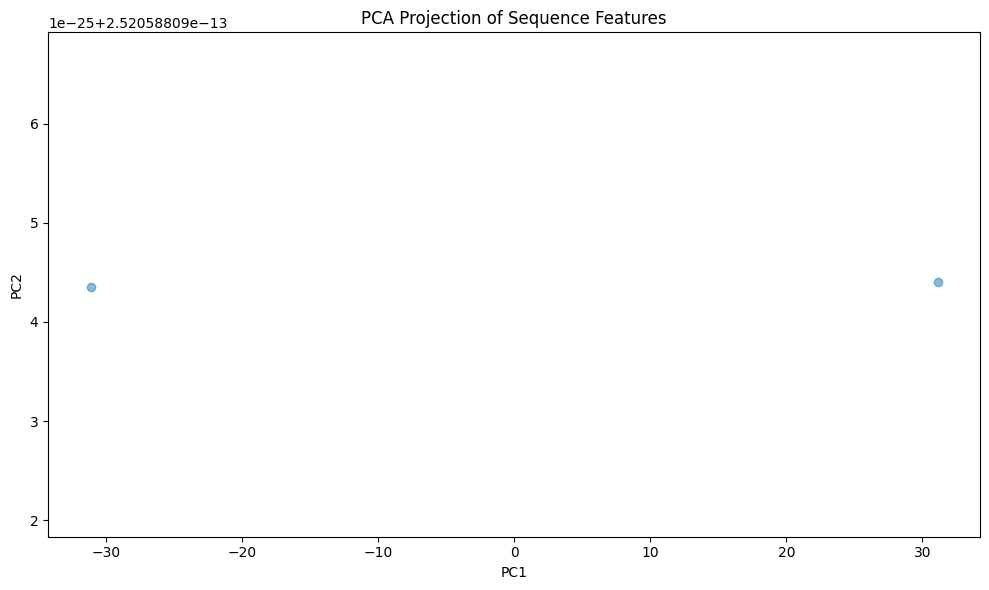

In [34]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Standardize features for PCA/t-SNE

# Impute missing values in seq_features before scaling
# Using median as it's less sensitive to outliers than mean
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
seq_features_imputed = imputer.fit_transform(seq_features.drop(columns=['sequence_id']))

# Now scale the imputed data
X_scaled = StandardScaler().fit_transform(seq_features_imputed)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.title("PCA Projection of Sequence Features")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

# Optional: If labels are available
# color by label to see separability

In [35]:
from scipy.stats import kurtosis, skew

skew_vals = seq_features.drop(columns=['sequence_id']).apply(skew)
kurt_vals = seq_features.drop(columns=['sequence_id']).apply(kurtosis)

skew_vals.sort_values(ascending=False).head(10)
kurt_vals.sort_values(ascending=False).head(10)


/usr/local/lib/python3.11/dist-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/apply.py:1081: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  results[i] = self.func(v, *self.args, **self.kwargs)


tof_4_v12_mean   -2.0
tof_4_v63_std    -2.0
acc_y_min        -2.0
tof_1_v2_mean    -2.0
tof_2_v55_std    -2.0
tof_4_v21_mean   -2.0
tof_5_v8_mean    -2.0
tof_4_v31_std    -2.0
thm_3_skew       -2.0
tof_1_v7_std     -2.0
dtype: float64

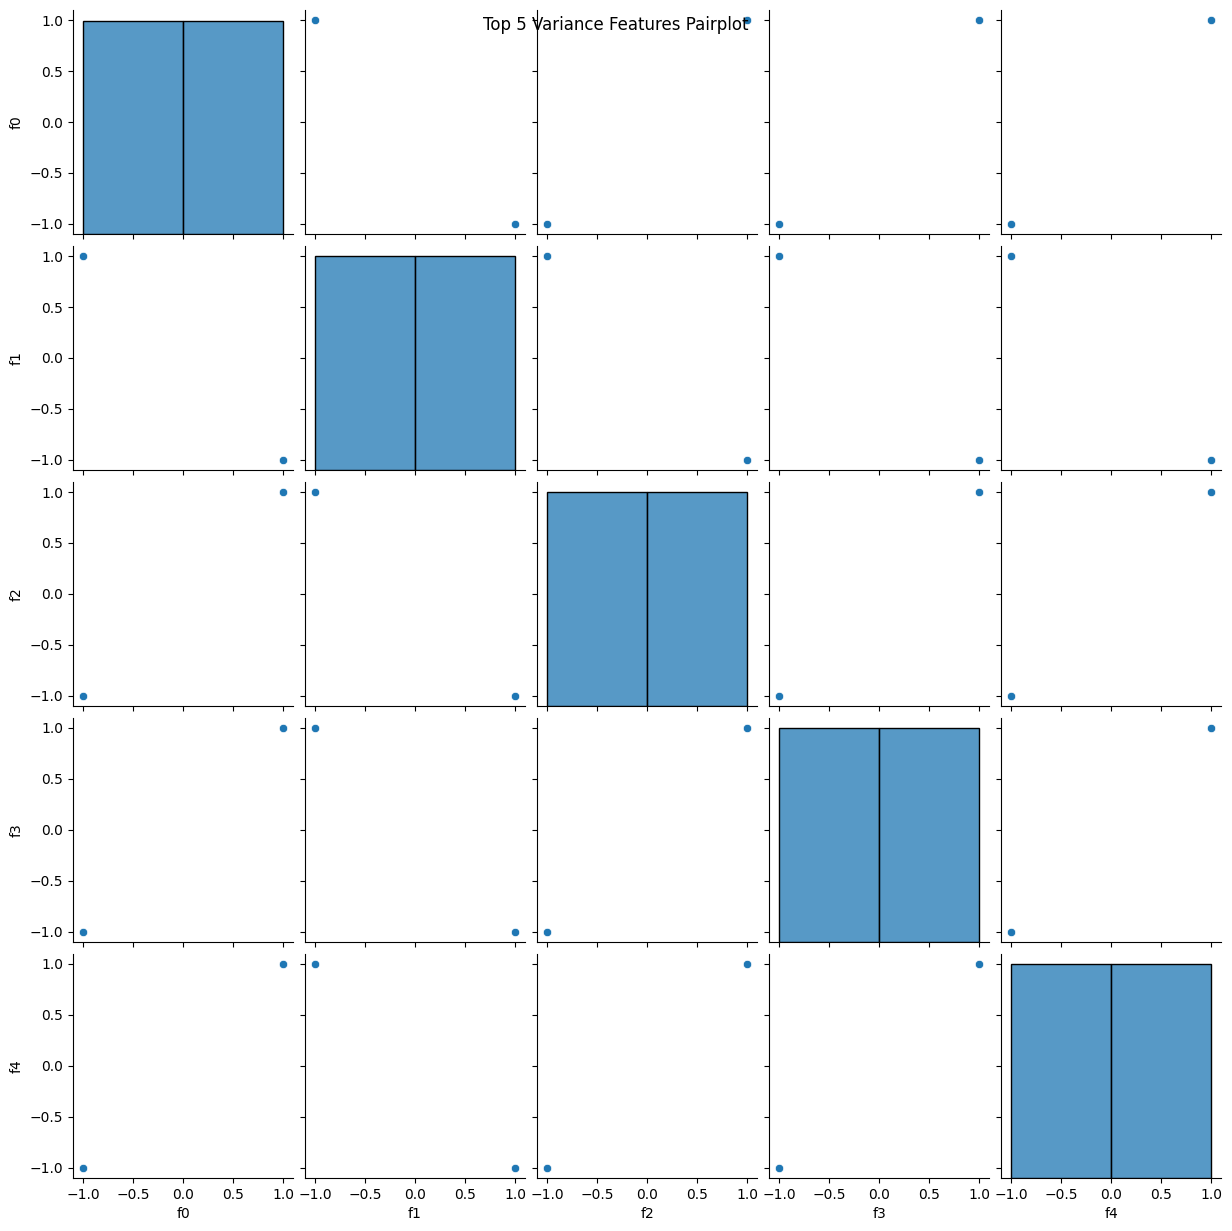

In [36]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder

# Reduce dimensionality a bit before pairplot
selector = VarianceThreshold(threshold=0.1)
X_var = selector.fit_transform(X_scaled)

import pandas as pd
sns.pairplot(pd.DataFrame(X_var[:, :5], columns=[f'f{i}' for i in range(5)]))
plt.suptitle("Top 5 Variance Features Pairplot")
plt.show()


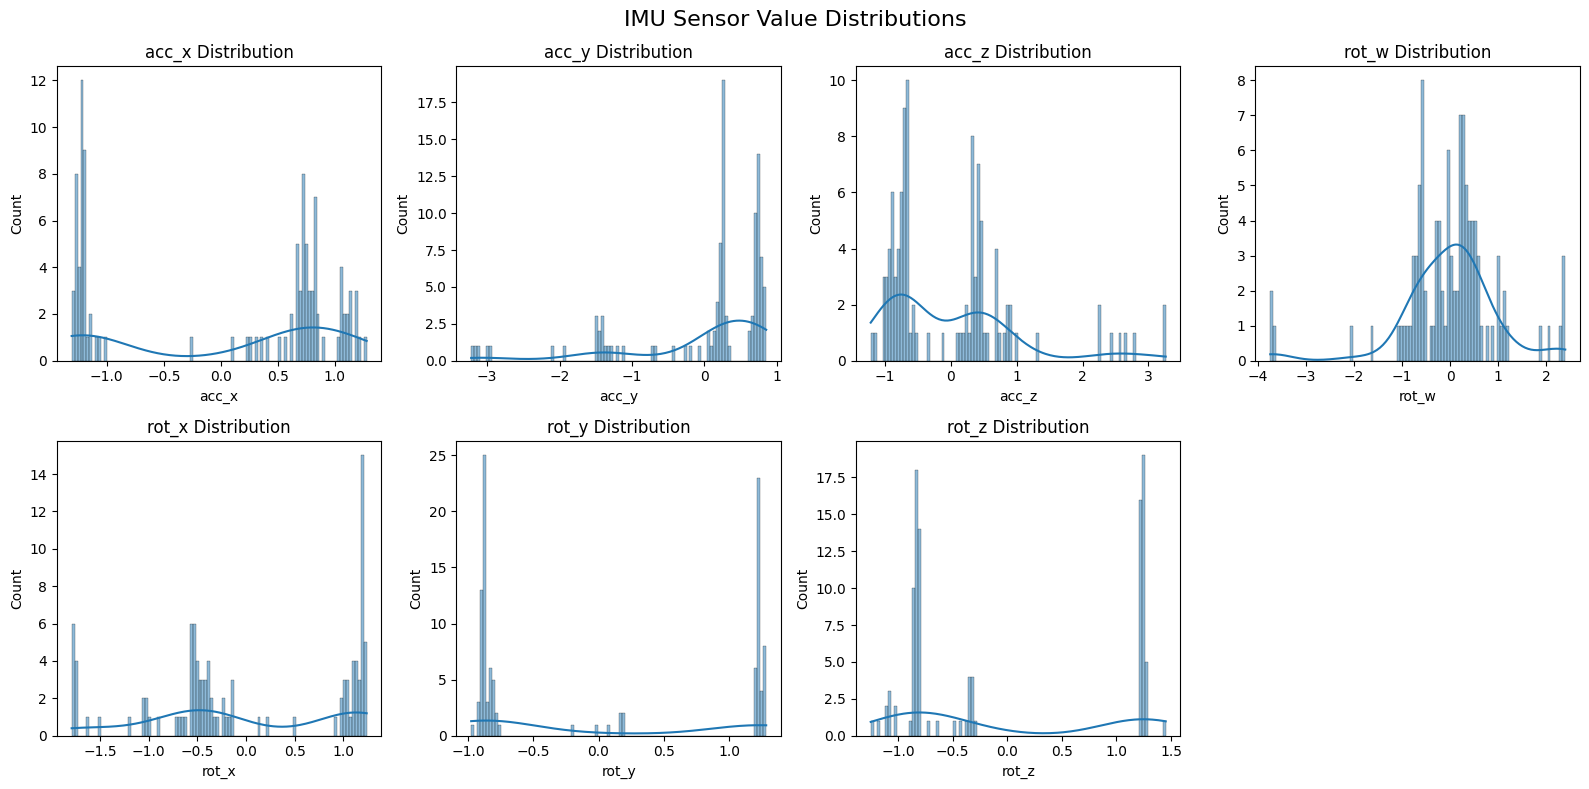

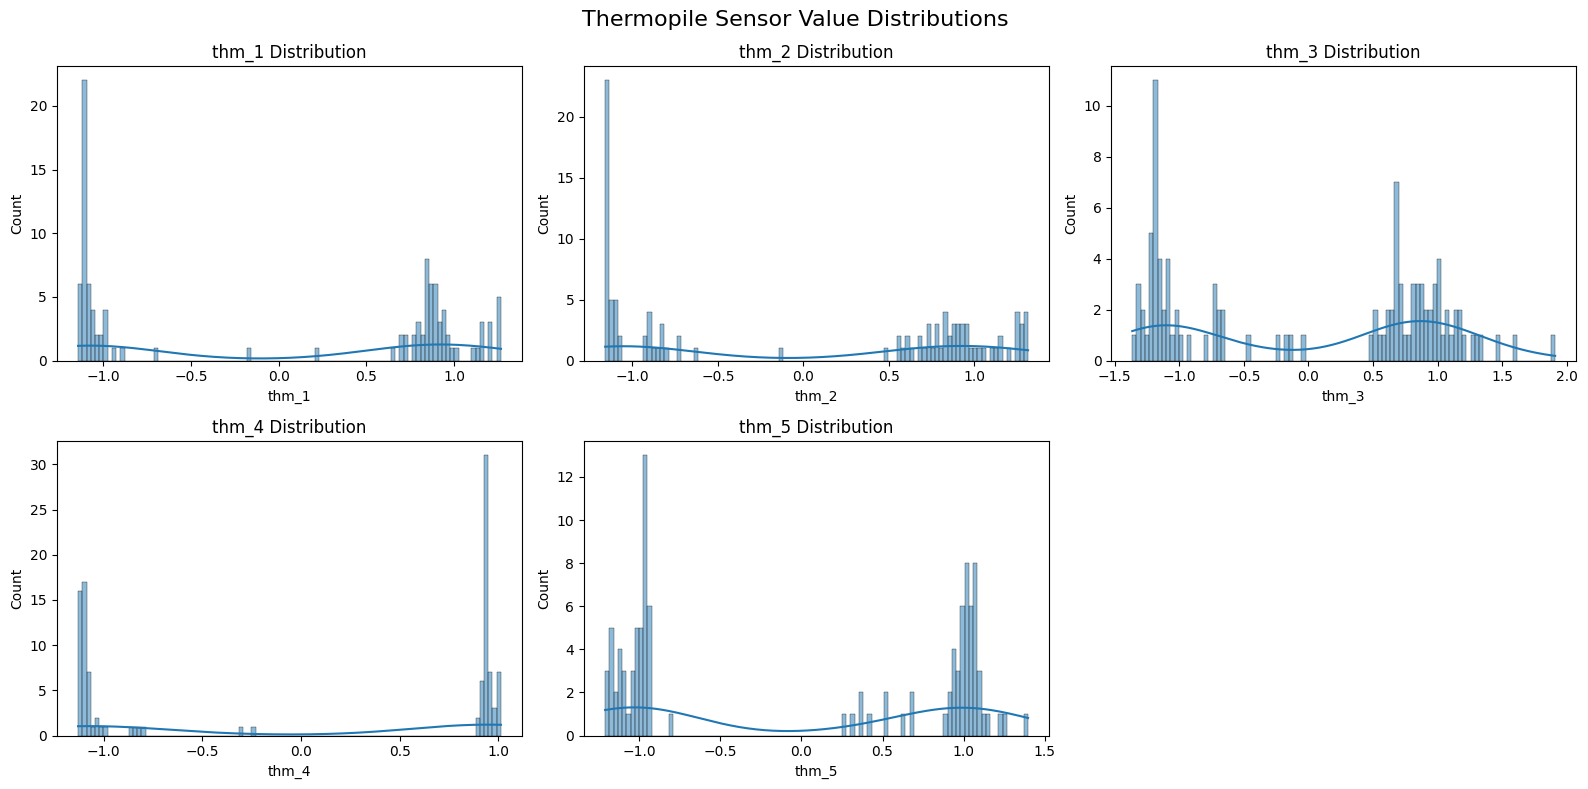

<ipython-input-37-fbfd472f44e1>:17: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


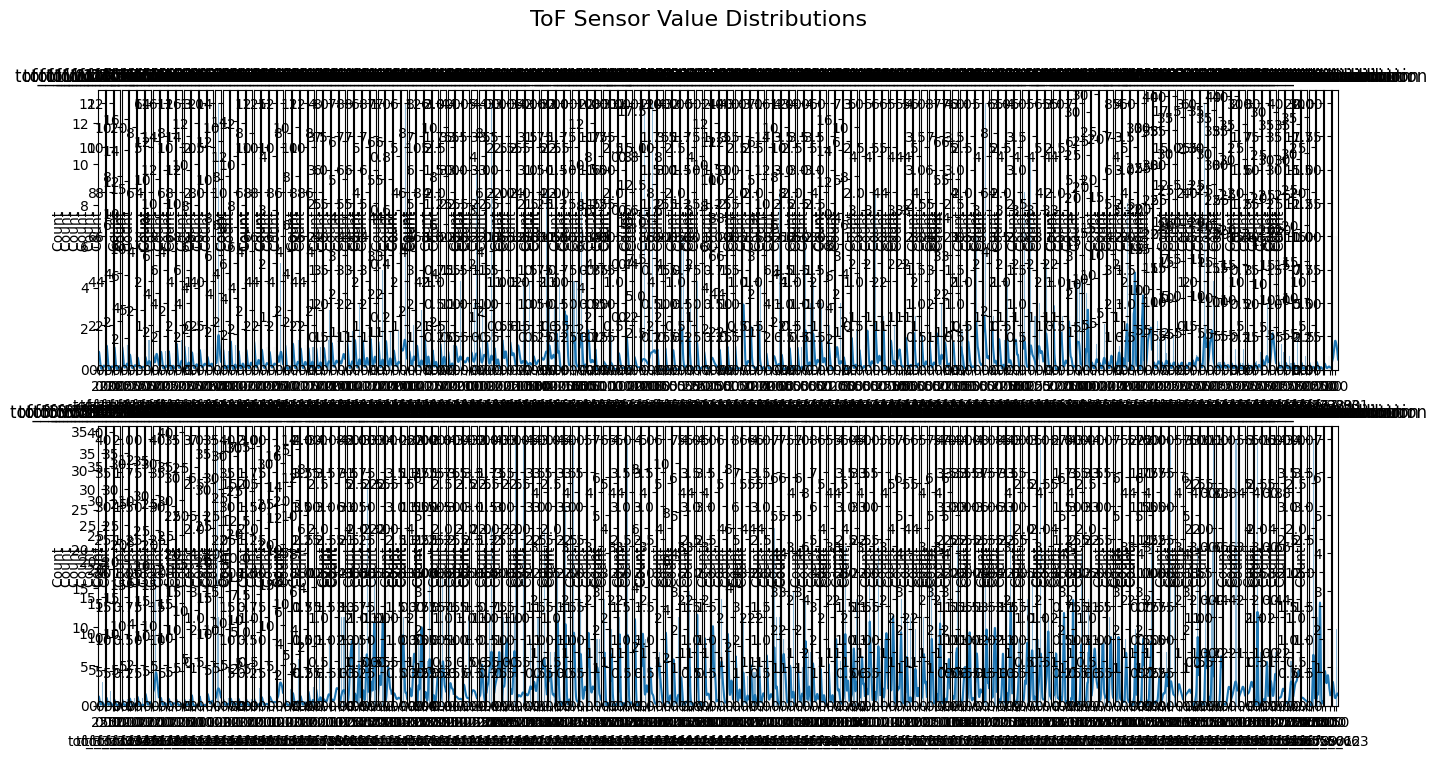

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sensor_groups = {
    'IMU': imu_cols,
    'Thermopile': thm_cols,
    'ToF': tof_cols
}

for group_name, group_cols in sensor_groups.items():
    plt.figure(figsize=(16, 8))
    for i, col in enumerate(group_cols):
        plt.subplot(2, int(np.ceil(len(group_cols) / 2)), i + 1)
        sns.histplot(test_data[col], bins=100, kde=True)
        plt.title(f"{col} Distribution")
    plt.suptitle(f"{group_name} Sensor Value Distributions", fontsize=16)
    plt.tight_layout()
    plt.show()


In [38]:
import missingno as msno

tof_data = test_data[tof_cols].replace(-1, np.nan)
msno.matrix(tof_data.sample(1000), figsize=(12, 5))
plt.title("Missing Value Matrix (ToF Sensors)")
plt.show()


ValueError: Cannot take a larger sample than population when 'replace=False'

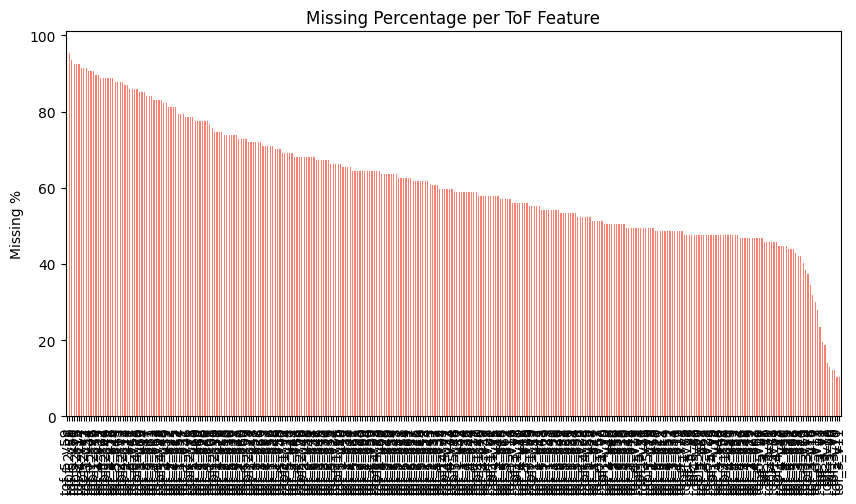

In [39]:
missing_percent = tof_data.isna().mean() * 100
missing_percent.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), color='salmon')
plt.title("Missing Percentage per ToF Feature")
plt.ylabel("Missing %")
plt.show()


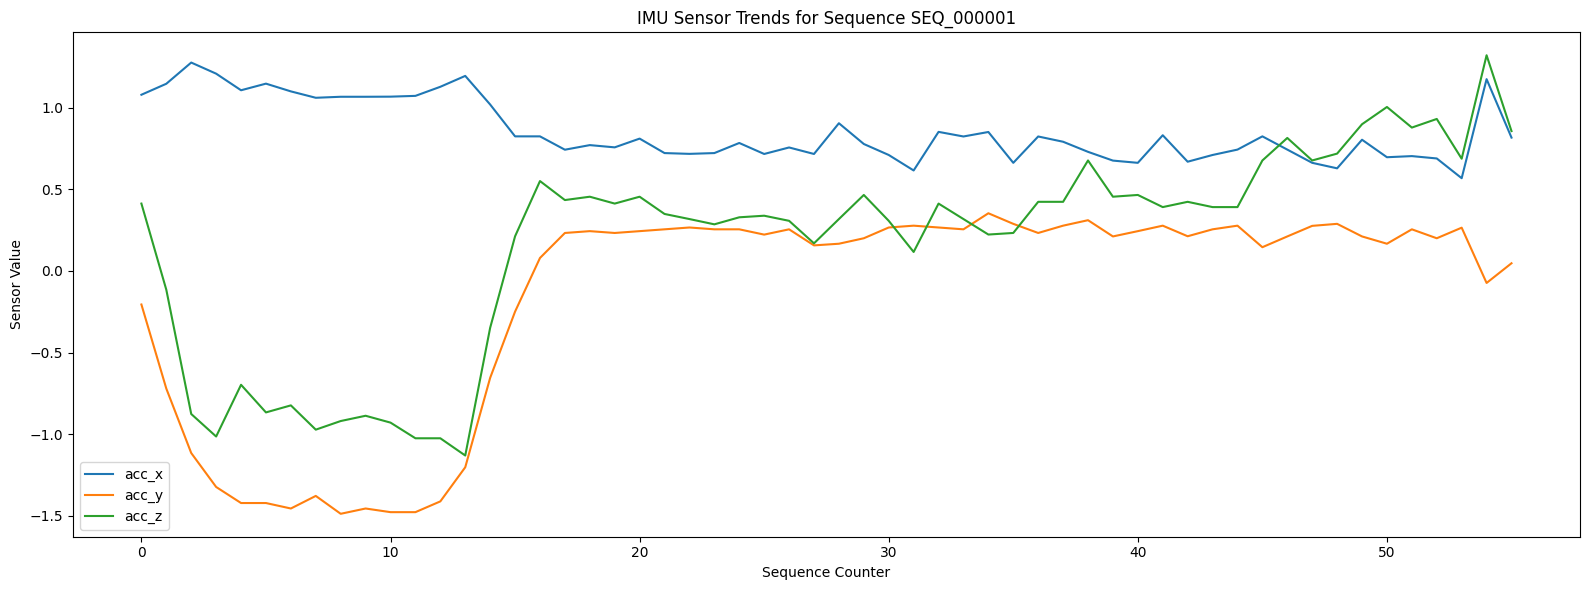

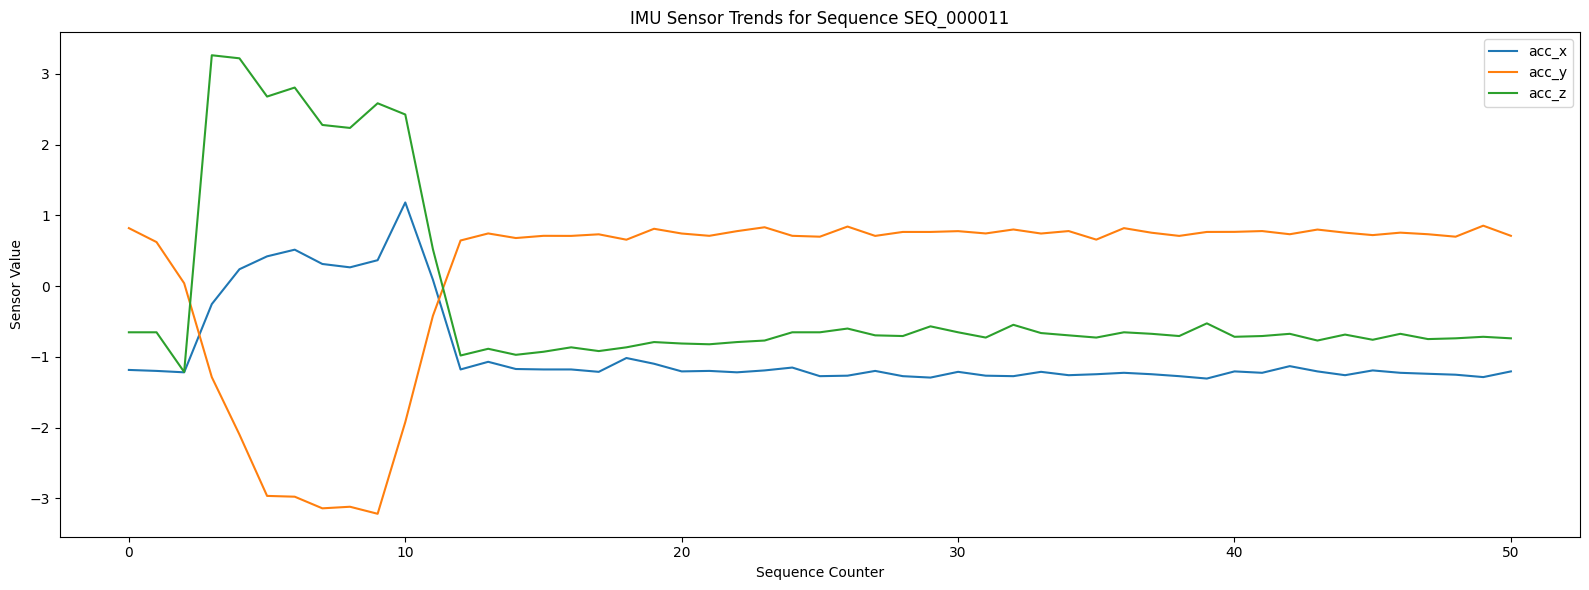

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sequence_ids = test_data['sequence_id'].unique()[:3]  # visualize a few sequences

for seq_id in sequence_ids:
    df_seq = test_data[test_data['sequence_id'] == seq_id]

    plt.figure(figsize=(16, 6))
    for col in imu_cols[:3]:  # choose first 3 IMU sensors for example
        # Changed 'step' to 'sequence_counter'
        plt.plot(df_seq['sequence_counter'], df_seq[col], label=col)
    plt.title(f"IMU Sensor Trends for Sequence {seq_id}")
    plt.xlabel("Sequence Counter") # Also update the x-label for clarity
    plt.ylabel("Sensor Value")
    plt.legend()
    plt.tight_layout()
    plt.show()

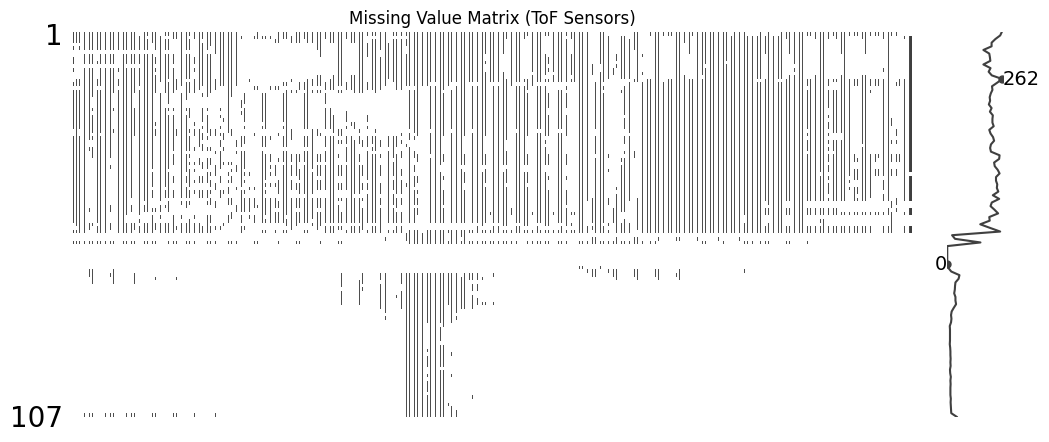

In [41]:
import missingno as msno
import numpy as np # Ensure numpy is imported if not already

tof_data = test_data[tof_cols].replace(-1, np.nan)

# Sample all rows since the dataset is small (107 rows)
# If the dataset were larger, you might sample a fixed number, e.g., .sample(500)
msno.matrix(tof_data, figsize=(12, 5)) # Removed .sample(1000)
plt.title("Missing Value Matrix (ToF Sensors)")
plt.show()

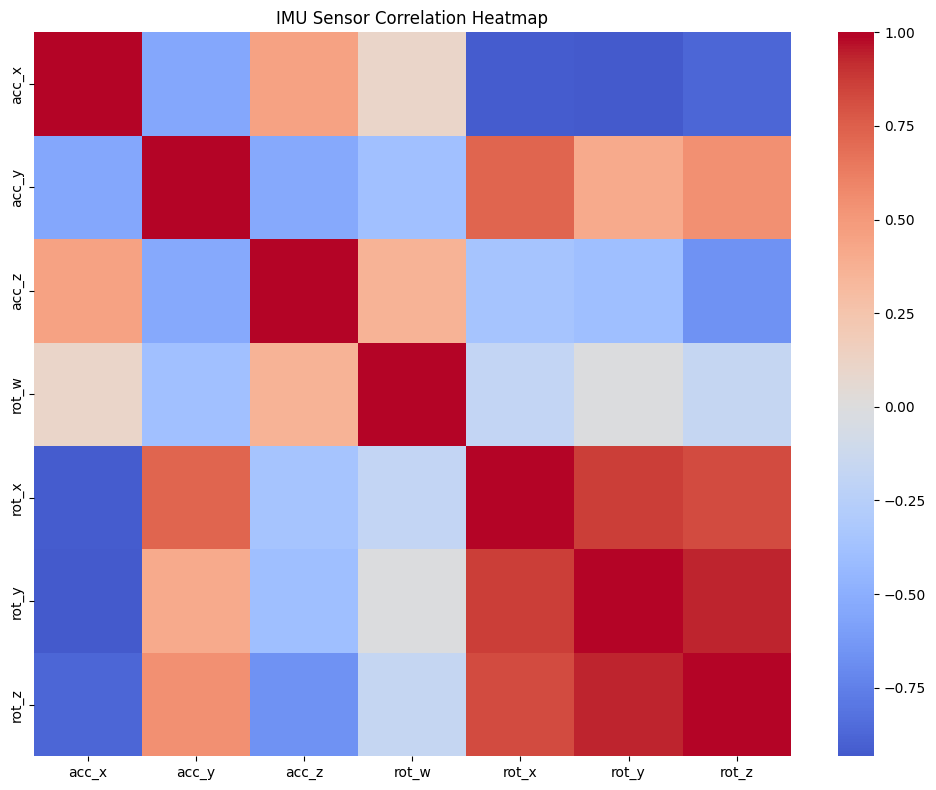

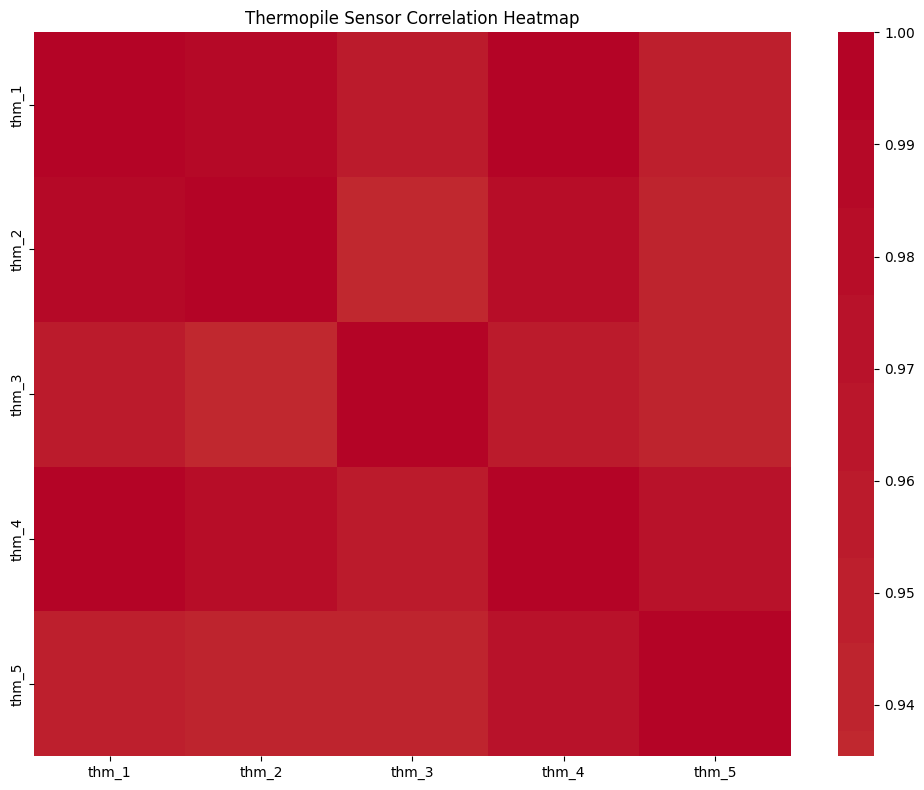

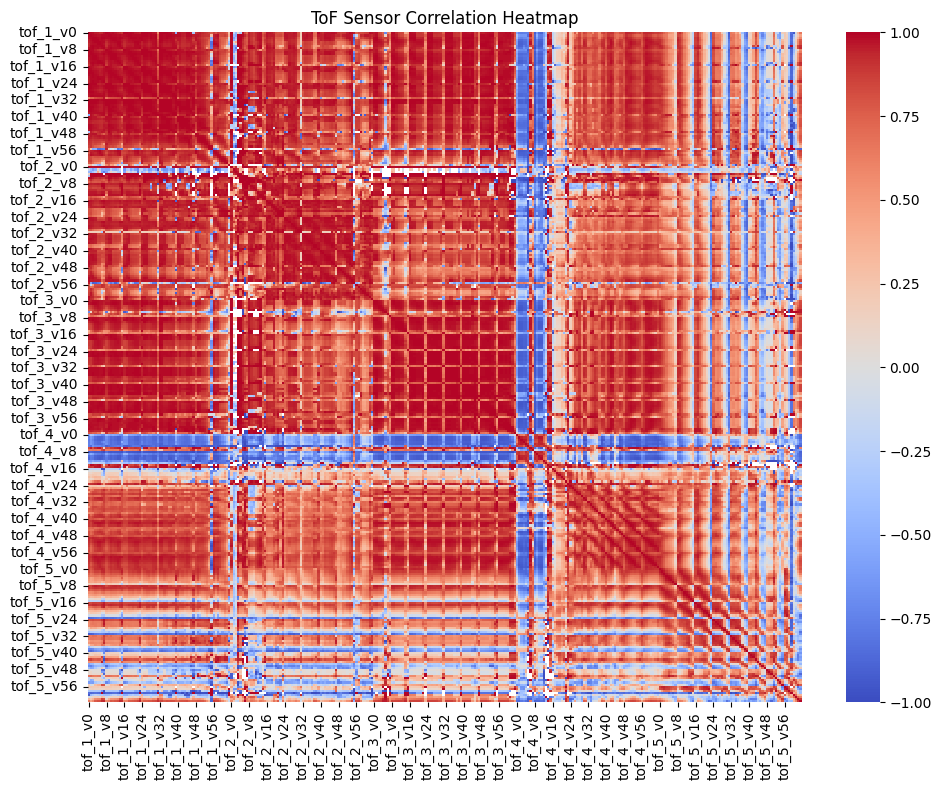

In [43]:
for group_name, group_cols in sensor_groups.items():
    plt.figure(figsize=(10, 8))
    sns.heatmap(test_data[group_cols].corr(), annot=False, cmap='coolwarm', center=0)
    plt.title(f"{group_name} Sensor Correlation Heatmap")
    plt.tight_layout()
    plt.show()


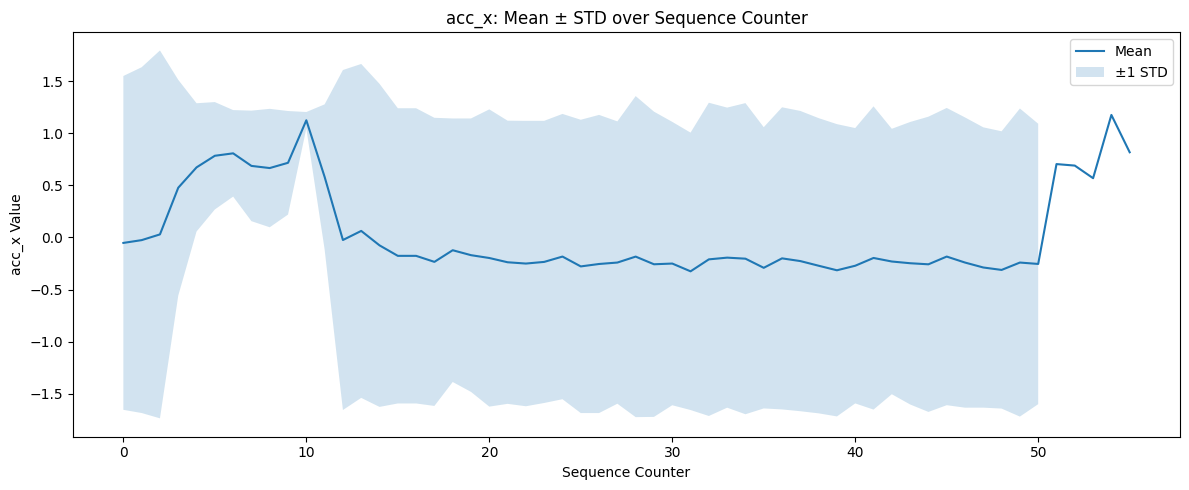

In [45]:
step_summary = test_data.groupby('sequence_counter')[imu_cols + thm_cols + tof_cols].agg(['mean', 'std'])
step_summary.columns = ['_'.join(col).strip() for col in step_summary.columns.values] # Added .strip() for clean column names

# Plot mean trend for IMU_0
plt.figure(figsize=(12, 5))
# Assuming 'IMU_0' corresponds to the first IMU column, which is 'acc_x' based on the global variable `imu_cols`
first_imu_col = imu_cols[0] # Get the first IMU column name dynamically
plt.plot(step_summary.index, step_summary[f'{first_imu_col}_mean'], label='Mean')
plt.fill_between(step_summary.index,
                 step_summary[f'{first_imu_col}_mean'] - step_summary[f'{first_imu_col}_std'],
                 step_summary[f'{first_imu_col}_mean'] + step_summary[f'{first_imu_col}_std'],
                 alpha=0.2, label='±1 STD')
plt.title(f"{first_imu_col}: Mean ± STD over Sequence Counter") # Update title
plt.xlabel("Sequence Counter") # Update xlabel
plt.ylabel(f"{first_imu_col} Value") # Update ylabel
plt.legend()
plt.tight_layout()
plt.show()

In [60]:
print(X_scaled.shape)


(2, 1992)


In [61]:
print(seq_features.shape)
print(X.shape)
print(X_scaled.shape)


(2, 1993)
(2, 1992)
(2, 1992)


   feature1  feature2 category  target
0 -0.457328  1.720133        A       1
1 -0.478581  7.135837        C       0
2  0.748516  9.442776        A       1
3  0.819717  9.448767        C       1
4 -2.472871  8.182481        A       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  100 non-null    float64
 1   feature2  100 non-null    float64
 2   category  100 non-null    object 
 3   target    100 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB
None
         feature1    feature2      target
count  100.000000  100.000000  100.000000
mean     0.009746    4.638432    0.490000
std      1.042395    2.821423    0.502418
min     -2.472871    0.004103    0.000000
25%     -0.785271    1.918240    0.000000
50%     -0.103461    5.030388    0.000000
75%      0.685502    6.682327    1.000000
max      2.619800    9.871

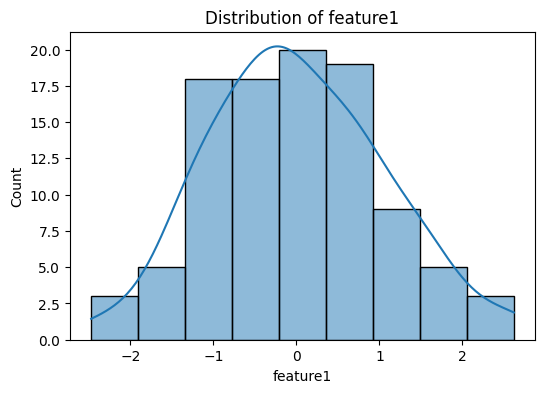

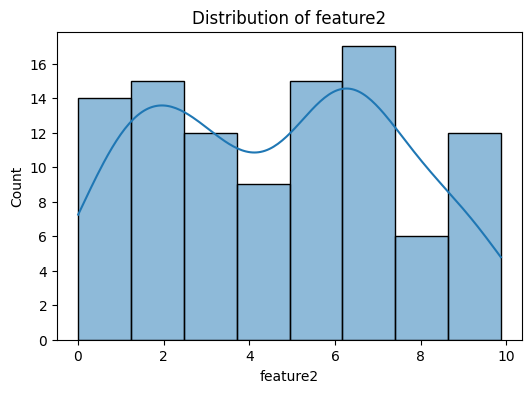

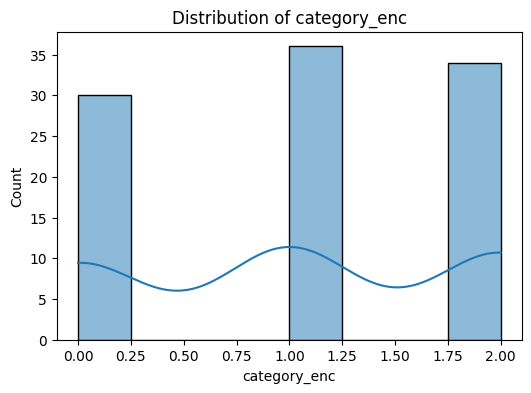

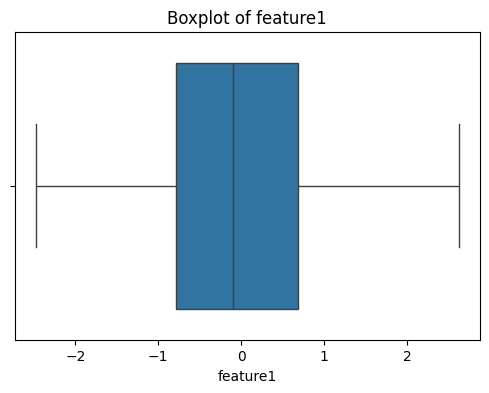

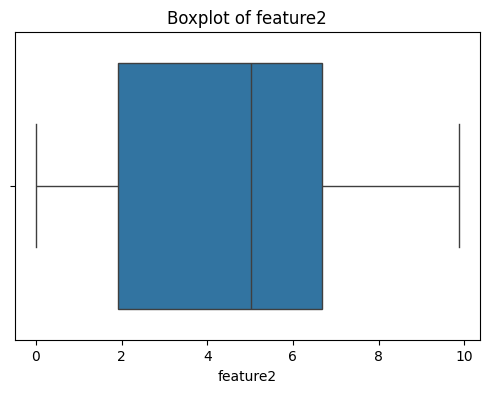

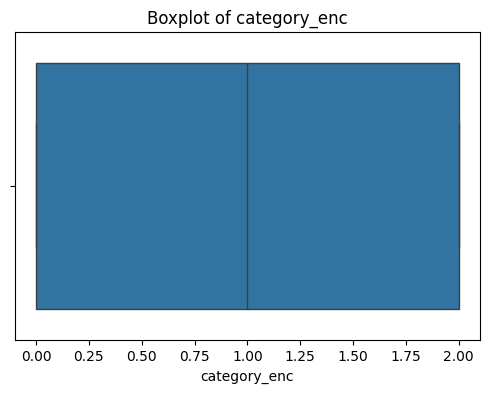

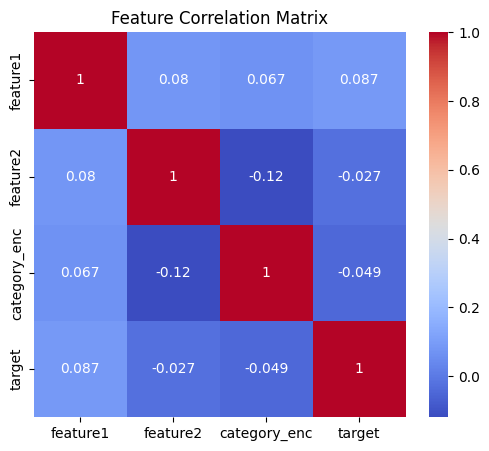

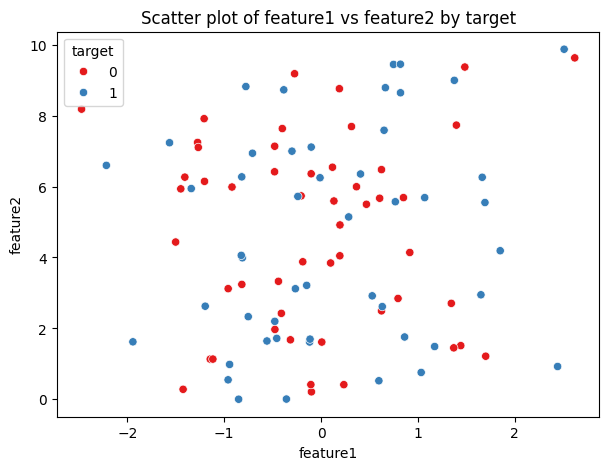

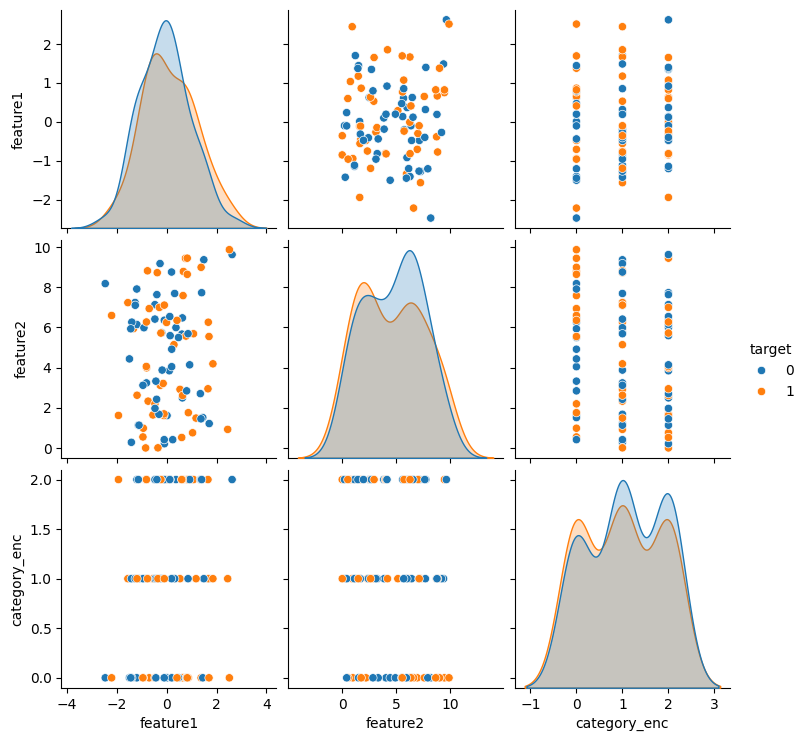

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load your data (replace with your actual dataset)
# df = pd.read_csv('your_dataset.csv')

# Sample Data for demonstration
df = pd.DataFrame({
    'feature1': np.random.normal(0, 1, 100),
    'feature2': np.random.uniform(0, 10, 100),
    'category': np.random.choice(['A', 'B', 'C'], 100),
    'target': np.random.choice([0, 1], 100)
})

# --- 1. Basic Data Exploration ---
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check missing values

# --- 2. Handle Missing Values (if any) ---
# Example: fill missing with mean
# df['feature1'].fillna(df['feature1'].mean(), inplace=True)

# --- 3. Encode categorical variables ---
label_enc = LabelEncoder()
df['category_enc'] = label_enc.fit_transform(df['category'])

# --- 4. Feature Selection ---
features = ['feature1', 'feature2', 'category_enc']
X = df[features]
y = df['target']

# --- 5. Feature Scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 6. Visualizations ---

# Histogram of features
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Boxplots to check for outliers
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

# Correlation heatmap
plt.figure(figsize=(6,5))
corr = df[features + ['target']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Scatter plot of two features colored by target
plt.figure(figsize=(7,5))
sns.scatterplot(x='feature1', y='feature2', hue='target', data=df, palette='Set1')
plt.title("Scatter plot of feature1 vs feature2 by target")
plt.show()

# Pairplot to visualize pairwise relationships
sns.pairplot(df[features + ['target']], hue='target', diag_kind='kde')
plt.show()


Data shape before removing outliers: (100, 5)
Data shape after removing outliers: (100, 5)


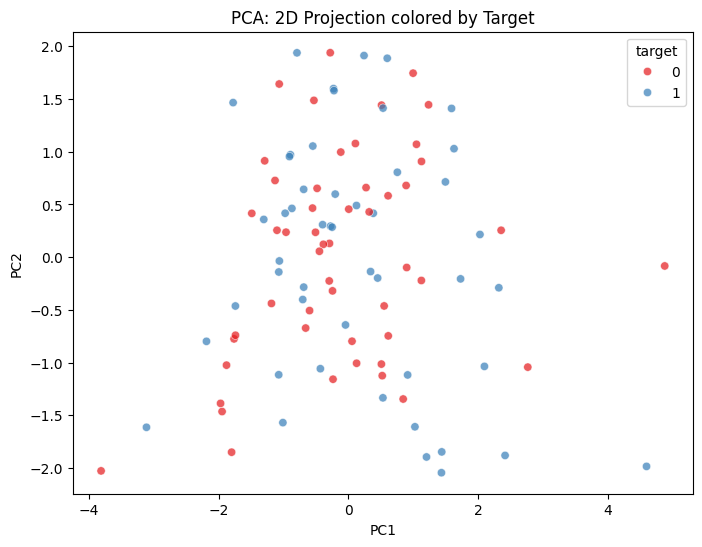

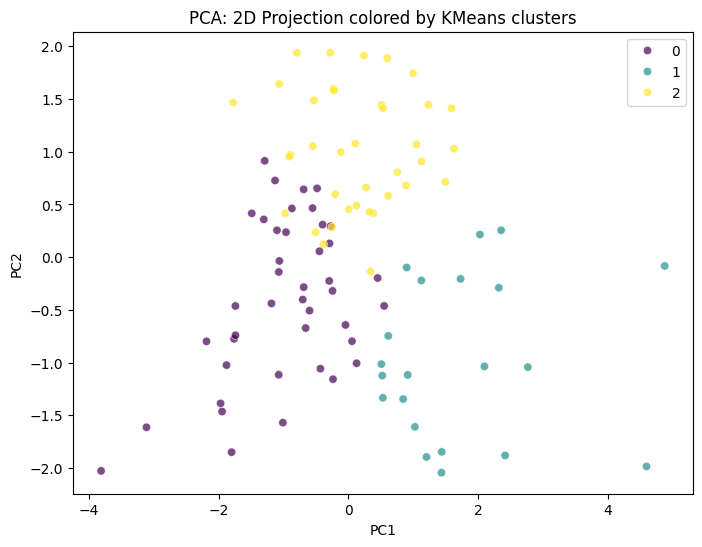

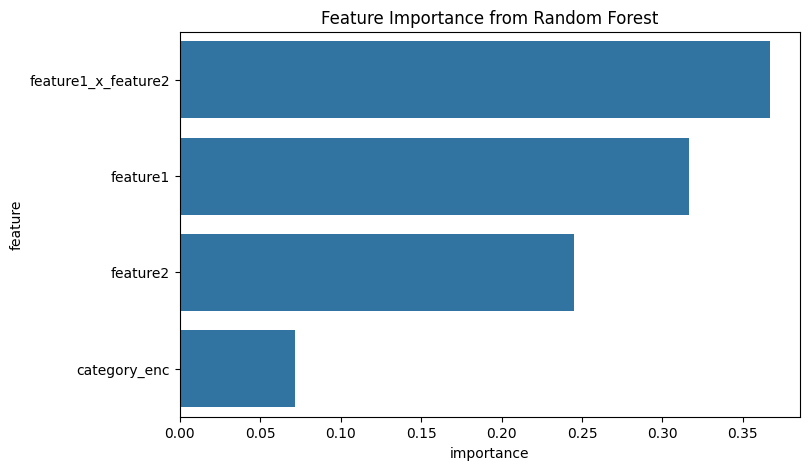

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assume df is your dataframe loaded earlier

# --- 1. Outlier Detection and Removal using IQR ---
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

features = ['feature1', 'feature2']  # numerical features only
df_clean = remove_outliers(df, features)

print(f"Data shape before removing outliers: {df.shape}")
print(f"Data shape after removing outliers: {df_clean.shape}")

# --- 2. Feature Engineering ---
# Example: create interaction term
df_clean['feature1_x_feature2'] = df_clean['feature1'] * df_clean['feature2']

# --- 3. Re-encode & scale features ---
label_enc = LabelEncoder()
df_clean['category_enc'] = label_enc.fit_transform(df_clean['category'])

features_updated = ['feature1', 'feature2', 'category_enc', 'feature1_x_feature2']
X = df_clean[features_updated]
y = df_clean['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. PCA for dimensionality reduction and visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title('PCA: 2D Projection colored by Target')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# --- 5. Clustering with KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.title('PCA: 2D Projection colored by KMeans clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Add cluster labels to dataframe for further analysis
df_clean['cluster'] = clusters

# --- 6. Feature Importance via Random Forest ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feat_importance_df = pd.DataFrame({'feature': features_updated, 'importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='importance', y='feature', data=feat_importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()


In [64]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
poly_feature_names = poly.get_feature_names_out(features_updated)

# Convert back to DataFrame for easier handling
df_poly = pd.DataFrame(X_poly, columns=poly_feature_names)
print(df_poly.head())


   feature1  feature2  category_enc  feature1_x_feature2  feature1^2  \
0 -0.450335 -1.039547     -1.301628            -0.168420    0.202801   
1 -0.470826  0.889617      1.201503            -0.584560    0.221677   
2  0.712294  1.711387     -1.301628             1.075171    0.507363   
3  0.780944  1.713521      1.201503             1.182396    0.609873   
4 -2.393644  1.262449     -1.301628            -3.247430    5.729532   

   feature1 feature2  feature1 category_enc  feature1 feature1_x_feature2  \
0           0.468144               0.586168                      0.075845   
1          -0.418855              -0.565699                      0.275226   
2           1.219011              -0.927142                      0.765838   
3           1.338164               0.938306                      0.923385   
4          -3.021854               3.115634                      7.773192   

   feature2^2  feature2 category_enc  feature2 feature1_x_feature2  \
0    1.080657               1.3531

In [65]:
import numpy as np

for feature in ['feature1', 'feature2']:
    df_clean[f'{feature}_log'] = np.log1p(df_clean[feature])  # log(1 + x) to avoid log(0)


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Data shape before removing outliers: (100, 5)
Data shape after removing outliers: (100, 5)


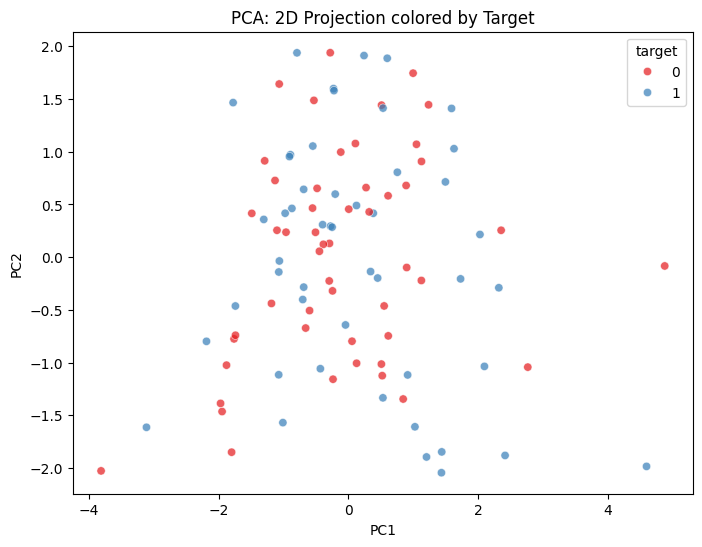

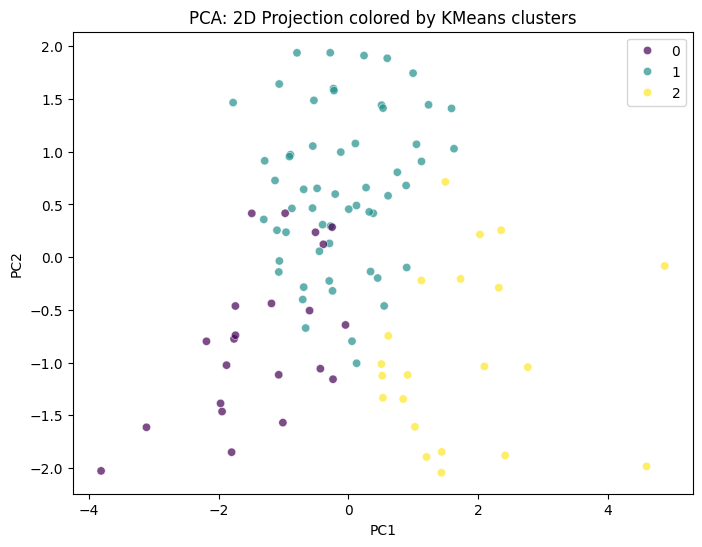

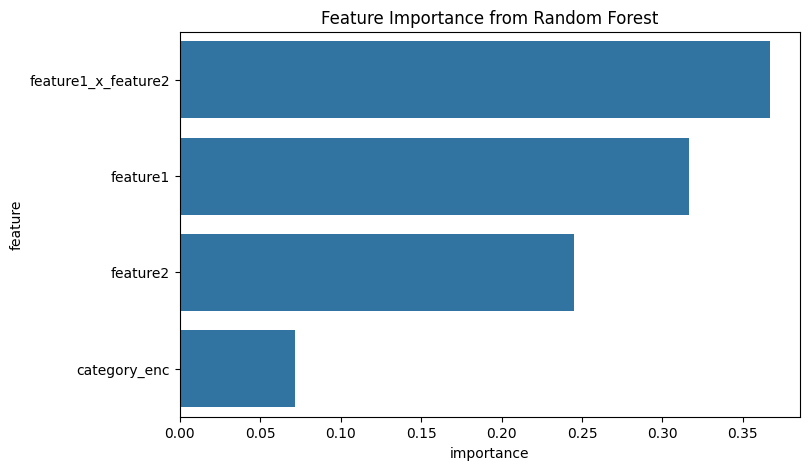

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assume df is your dataframe loaded earlier

# --- 1. Outlier Detection and Removal using IQR ---
def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]
    return df

features = ['feature1', 'feature2']  # numerical features only
df_clean = remove_outliers(df, features)

print(f"Data shape before removing outliers: {df.shape}")
print(f"Data shape after removing outliers: {df_clean.shape}")

# --- 2. Feature Engineering ---
# Example: create interaction term
df_clean['feature1_x_feature2'] = df_clean['feature1'] * df_clean['feature2']

# --- 3. Re-encode & scale features ---
label_enc = LabelEncoder()
# Handle potential unseen categories if outliers were removed
# This might raise an error if a category was entirely removed by outlier filtering
# A more robust approach for small samples might be to encode before outlier removal
# Or handle unseen labels during transform if this was training/testing split
# For this example, we'll assume categories in df_clean are subset of df
df_clean['category_enc'] = label_enc.fit_transform(df_clean['category'])


features_updated = ['feature1', 'feature2', 'category_enc', 'feature1_x_feature2']
X = df_clean[features_updated]
y = df_clean['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 4. PCA for dimensionality reduction and visualization ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title('PCA: 2D Projection colored by Target')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# --- 5. Clustering with KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) # Added n_init to suppress warning
clusters = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', alpha=0.7)
plt.title('PCA: 2D Projection colored by KMeans clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Add cluster labels to dataframe for further analysis
df_clean['cluster'] = clusters

# --- 6. Feature Importance via Random Forest ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feat_importance_df = pd.DataFrame({'feature': features_updated, 'importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='importance', y='feature', data=feat_importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()

In [69]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

poly_feats = pipeline.fit_transform(df_clean[numeric_features])
poly_feature_names = pipeline.named_steps['poly'].get_feature_names_out(numeric_features)
df_poly_feats = pd.DataFrame(poly_feats, columns=poly_feature_names)


In [70]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Suppose df_clean is your dataframe and numeric_features is your list of numeric columns
numeric_features = ['feature1', 'feature2', 'feature1_log']  # Replace with your actual features

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),          # Step 1: Fill missing values with mean
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Step 2: Create polynomial features (degree 2)
    ('scaler', StandardScaler())                           # Step 3: Scale features to mean=0, std=1
])

# Fit and transform your data
X_processed = pipeline.fit_transform(df_clean[numeric_features])

# Get the new feature names after polynomial transformation
poly_feature_names = pipeline.named_steps['poly'].get_feature_names_out(numeric_features)

# Create a DataFrame for easy viewing and further processing
df_processed = pd.DataFrame(X_processed, columns=poly_feature_names)

print(df_processed.head())


   feature1  feature2  feature1_log  feature1^2  feature1 feature2  \
0 -0.450335 -1.039547 -5.884573e-01   -0.602217          -0.168420   
1 -0.470826  0.889617 -6.326308e-01   -0.588395          -0.584560   
2  0.712294  1.711387  7.052154e-01   -0.358231           1.075171   
3  0.780944  1.713521  7.493476e-01   -0.280642           1.182396   
4 -2.393644  1.262449 -1.534448e-17    3.501612          -3.247430   

   feature1 feature1_log  feature2^2  feature2 feature1_log  feature1_log^2  
0              -0.415899   -0.964517              -0.277851       -0.247777  
1              -0.376666    0.785283              -1.135902       -0.220042  
2              -0.246431    2.180628               1.232264       -0.281545  
3              -0.157847    2.184757               1.323066       -0.256140  
4              -0.518633    1.370218              -0.181274       -0.449799  


In [71]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline

# Suppose df_clean is your dataframe and numeric_features is your list of numeric columns
numeric_features = ['feature1', 'feature2', 'feature1_log']  # Replace with your actual features

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),          # Step 1: Fill missing values with mean
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),  # Step 2: Create polynomial features (degree 2)
    ('scaler', StandardScaler())                           # Step 3: Scale features to mean=0, std=1
])

# Fit and transform your data
X_processed = pipeline.fit_transform(df_clean[numeric_features])

# Get the new feature names after polynomial transformation
poly_feature_names = pipeline.named_steps['poly'].get_feature_names_out(numeric_features)

# Create a DataFrame for easy viewing and further processing
df_processed = pd.DataFrame(X_processed, columns=poly_feature_names)

print(df_processed.head())


   feature1  feature2  feature1_log  feature1^2  feature1 feature2  \
0 -0.450335 -1.039547 -5.884573e-01   -0.602217          -0.168420   
1 -0.470826  0.889617 -6.326308e-01   -0.588395          -0.584560   
2  0.712294  1.711387  7.052154e-01   -0.358231           1.075171   
3  0.780944  1.713521  7.493476e-01   -0.280642           1.182396   
4 -2.393644  1.262449 -1.534448e-17    3.501612          -3.247430   

   feature1 feature1_log  feature2^2  feature2 feature1_log  feature1_log^2  
0              -0.415899   -0.964517              -0.277851       -0.247777  
1              -0.376666    0.785283              -1.135902       -0.220042  
2              -0.246431    2.180628               1.232264       -0.281545  
3              -0.157847    2.184757               1.323066       -0.256140  
4              -0.518633    1.370218              -0.181274       -0.449799  


In [ ]:
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.fft import fft

def extract_features(window):
    features = {}
    for i, sensor_signal in enumerate(window.T):
        features[f'sensor_{i}_mean'] = np.mean(sensor_signal)
        features[f'sensor_{i}_std'] = np.std(sensor_signal)
        features[f'sensor_{i}_min'] = np.min(sensor_signal)
        features[f'sensor_{i}_max'] = np.max(sensor_signal)
        features[f'sensor_{i}_range'] = np.ptp(sensor_signal)
        features[f'sensor_{i}_skew'] = skew(sensor_signal)
        features[f'sensor_{i}_kurtosis'] = kurtosis(sensor_signal)

        # Frequency features: energy of FFT coefficients
        fft_coeffs = np.abs(fft(sensor_signal))
        features[f'sensor_{i}_fft_energy'] = np.sum(fft_coeffs**2)

    return features

feature_list = [extract_features(window) for window in segments]
features_df = pd.DataFrame(feature_list)


In [76]:
# Impute missing values (simple forward fill or mean imputation)

# Forward fill first
df.fillna(method='ffill', inplace=True)

# Identify numeric columns to calculate mean only for them
# Use select_dtypes to pick only numeric types
numeric_cols_for_mean = df.select_dtypes(include=np.number).columns

# Fill remaining NaNs (if any) in numeric columns with the mean of those columns
df[numeric_cols_for_mean] = df[numeric_cols_for_mean].fillna(df[numeric_cols_for_mean].mean())

# Normalize sensor features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Ensure sensor_cols list only contains columns present in the dataframe
# and are numeric before scaling.
# Based on the previous code, these are likely already numeric after the fillna steps
sensor_cols = [col for col in df.columns if ('accel' in col or 'gyro' in col or 'thermo' in col or 'proxi' in col) and col in df.select_dtypes(include=np.number).columns]


# Check if sensor_cols is empty to avoid error if no such columns are found
if sensor_cols:
    df[sensor_cols] = scaler.fit_transform(df[sensor_cols])
else:
    print("Warning: No numeric sensor columns found based on the naming pattern.")


# Segment data into windows (example 2-second windows with 50% overlap)

window_size = 100  # depends on sampling rate
step_size = window_size // 2

segments = []
labels = []

# Check if 'gesture_type' column exists before using it
if 'gesture_type' in df.columns:
    for start in range(0, len(df) - window_size, step_size):
        window = df.iloc[start:start + window_size]
        # Check if sensor_cols is not empty before trying to subset
        if sensor_cols and window['gesture_type'].nunique() == 1:  # homogeneous window
            segments.append(window[sensor_cols].values)
            labels.append(window['gesture_type'].iloc[0])

    segments = np.array(segments)
    labels = np.array(labels)
    print(f"Created {len(segments)} segments.")
else:
    print("Warning: 'gesture_type' column not found. Cannot segment data by gesture type.")

<ipython-input-76-9cbd439d6588>:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(labels)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features_df, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred))


NameError: name 'features_df' is not defined

In [78]:
# Example data: 100 samples, 50 time steps, 10 sensor features
import numpy as np
segments = np.random.rand(100, 50, 10)

# Corresponding labels for these 100 samples
labels = ['BFRB' if i % 2 == 0 else 'non-BFRB' for i in range(100)]


In [79]:
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.fft import fft

def extract_features(window):
    features = {}
    for i in range(window.shape[1]):  # loop over sensors/features
        signal = window[:, i]
        features[f'sensor_{i}_mean'] = np.mean(signal)
        features[f'sensor_{i}_std'] = np.std(signal)
        features[f'sensor_{i}_min'] = np.min(signal)
        features[f'sensor_{i}_max'] = np.max(signal)
        features[f'sensor_{i}_range'] = np.ptp(signal)
        features[f'sensor_{i}_skew'] = skew(signal)
        features[f'sensor_{i}_kurtosis'] = kurtosis(signal)
        fft_vals = np.abs(fft(signal))
        features[f'sensor_{i}_fft_energy'] = np.sum(fft_vals**2)
    return features

feature_list = [extract_features(w) for w in segments]
features_df = pd.DataFrame(feature_list)


In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()
y_encoded = le.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(
    features_df, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

        BFRB       0.56      0.50      0.53        10
    non-BFRB       0.55      0.60      0.57        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



In [82]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = {
    "Logistic Regression": make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": make_pipeline(StandardScaler(), SVC(kernel='rbf', probability=True))
}

for name, model in models.items():
    scores = cross_val_score(model, features_df, y_encoded, cv=5, scoring='accuracy')
    print(f"{name} Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression Accuracy: 0.5600 ± 0.1020
Random Forest Accuracy: 0.5400 ± 0.1068
Gradient Boosting Accuracy: 0.5700 ± 0.1122
SVM Accuracy: 0.5300 ± 0.1470


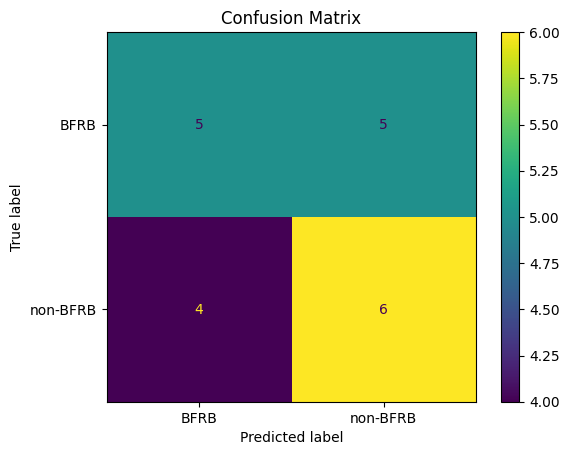

In [83]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix")
plt.show()


<ipython-input-84-a89eba2b1105>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feats.values, y=top_feats.index, palette='viridis')


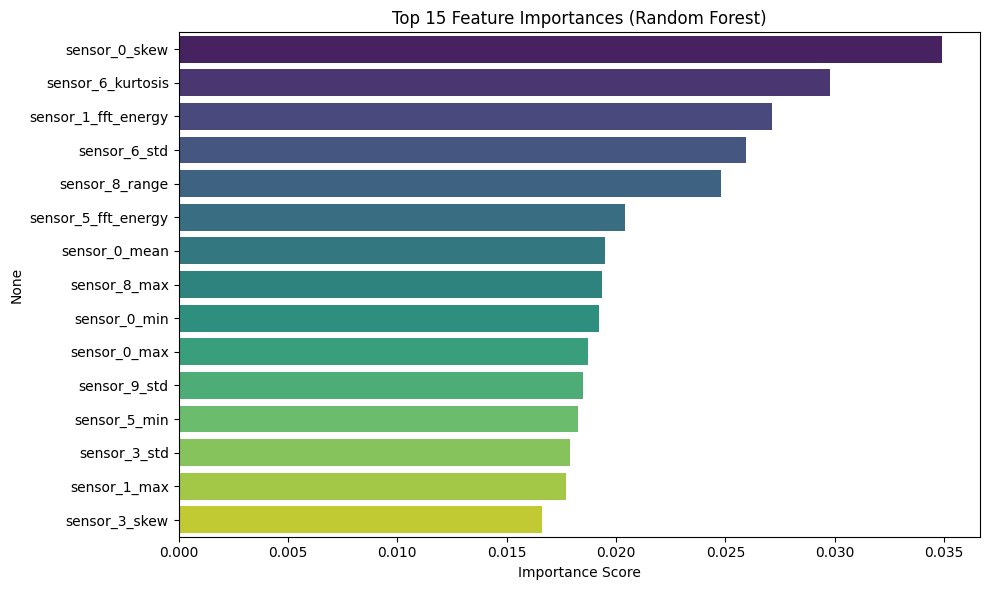

In [84]:
import pandas as pd
import seaborn as sns

importances = clf.feature_importances_
feat_importances = pd.Series(importances, index=features_df.columns)
top_feats = feat_importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_feats.values, y=top_feats.index, palette='viridis')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

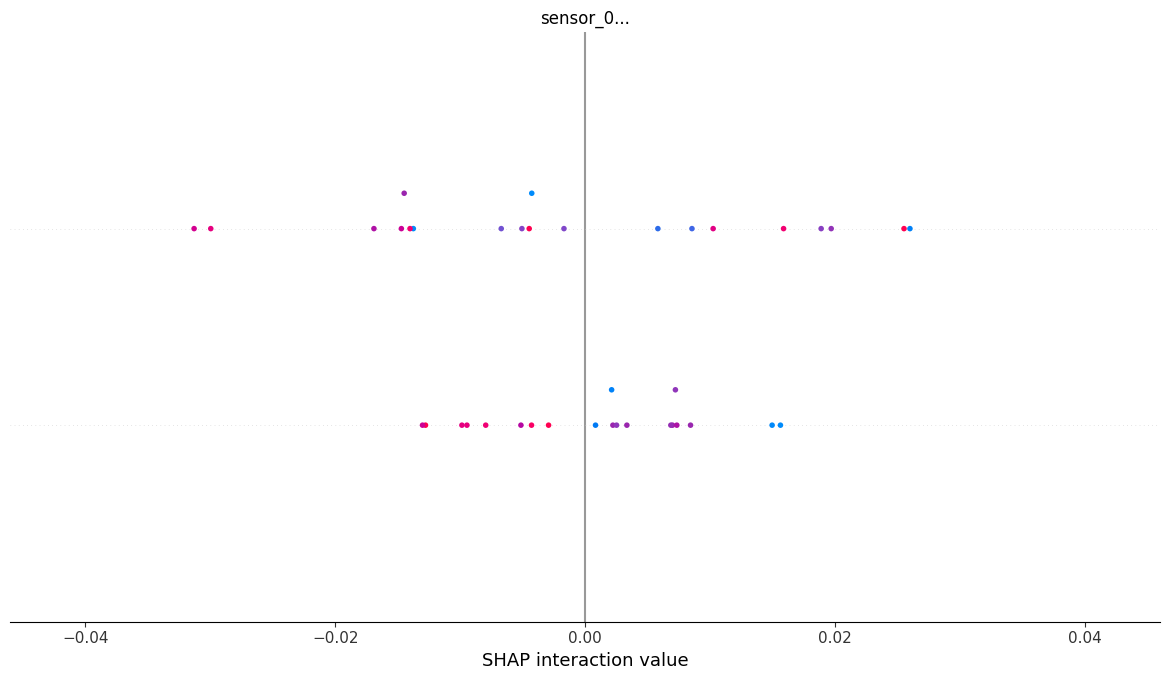

In [85]:
import shap

explainer = shap.Explainer(clf, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=features_df.columns)


In [86]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', make_pipeline(StandardScaler(), SVC(probability=True)))
]

stacked = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5
)

stacked.fit(X_train, y_train)
y_pred_stack = stacked.predict(X_test)
print("Stacked Model Performance:")
print(classification_report(y_test, y_pred_stack, target_names=le.classes_))


Stacked Model Performance:
              precision    recall  f1-score   support

        BFRB       0.56      0.50      0.53        10
    non-BFRB       0.55      0.60      0.57        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



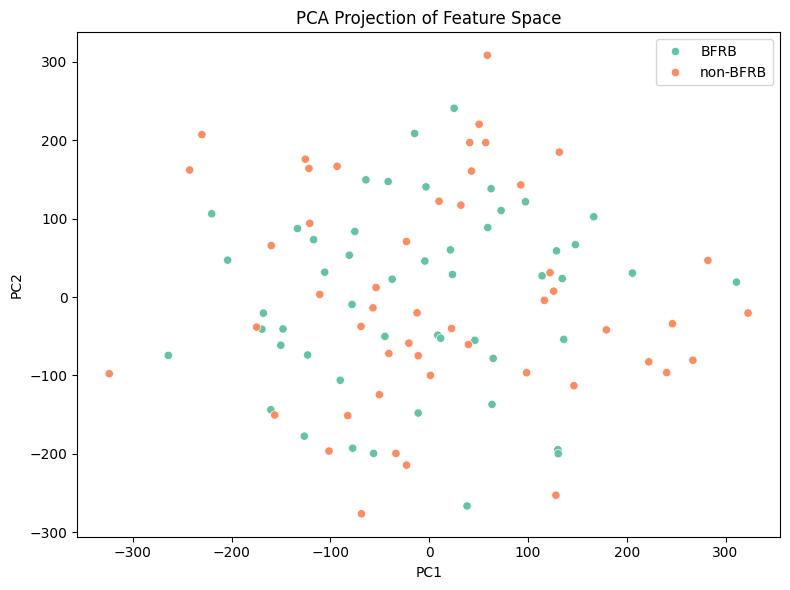

In [87]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_df)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=le.inverse_transform(y_encoded), palette="Set2")
plt.title("PCA Projection of Feature Space")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Accuracy: 0.6625


In [90]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score

print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=le.classes_))


Test Accuracy: 0.55
              precision    recall  f1-score   support

        BFRB       0.56      0.50      0.53        10
    non-BFRB       0.55      0.60      0.57        10

    accuracy                           0.55        20
   macro avg       0.55      0.55      0.55        20
weighted avg       0.55      0.55      0.55        20



In [91]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

gb = GradientBoostingClassifier(random_state=42)

grid_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_gb.fit(X_train, y_train)

print("Best Gradient Boosting Params:", grid_gb.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Gradient Boosting Params: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [92]:
print(pd.Series(y_train).value_counts())


0    40
1    40
Name: count, dtype: int64


In [93]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Resampled class distribution:", pd.Series(y_train_res).value_counts())


Resampled class distribution: 0    40
1    40
Name: count, dtype: int64


In [94]:
from sklearn.feature_selection import RFECV

selector = RFECV(estimator=RandomForestClassifier(n_estimators=100, random_state=42),
                 step=1,
                 cv=5,
                 scoring='accuracy')

selector.fit(X_train, y_train)

X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

print("Optimal number of features:", selector.n_features_)


Optimal number of features: 65


In [95]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf),
        ('gb', grid_gb.best_estimator_)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)

print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred_vote))


Voting Classifier Accuracy: 0.6


In [96]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode labels
num_classes = len(np.unique(y_train))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)


In [97]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,538 (84.13 KB)

 Trainable params: 21,154 (82.63 KB)

 Non-trainable params: 384 (1.50 KB)

In [98]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 598ms/step - accuracy: 0.5104 - loss: 1.1826 - val_accuracy: 0.5000 - val_loss: 0.7012
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5000 - loss: 1.2071 - val_accuracy: 0.4375 - val_loss: 0.6950
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.4271 - loss: 0.9753 - val_accuracy: 0.3750 - val_loss: 0.6867
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.6458 - loss: 0.6693 - val_accuracy: 0.4375 - val_loss: 0.6770
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - accuracy: 0.4688 - loss: 0.9556 - val_accuracy: 0.4375 - val_loss: 0.6702
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.6667 - loss: 0.6268 - val_accuracy: 0.4375 - val_loss: 0.6667
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6146 - loss: 0.7386 - val_accuracy: 0.5000 - val_loss: 0.6650
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.6458 - loss: 0.6524 - val_accuracy: 0.5625 - v

In [99]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")


✅ Test Accuracy: 65.00%


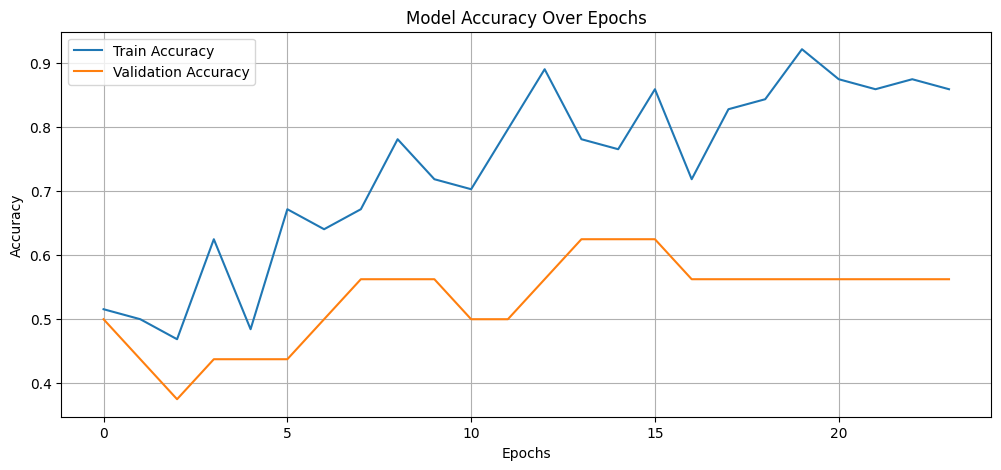

In [100]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


In [101]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Encode target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # e.g., 0 and 1
y_cat = to_categorical(y_encoded)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y_cat)


In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical # Make sure this is imported

# X has shape (samples, features) where samples are segments/windows
# The input layer should match the number of features (columns) in X
input_dim = X.shape[1] # Get the number of features from the DataFrame X

model = Sequential([
    # Replace Conv1D with Dense for a flattened feature input
    Dense(128, input_shape=(input_dim,), activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    # Output layer should match the number of unique classes
    # y_cat.shape[1] gives the number of columns in the one-hot encoded target, which is the number of classes
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,810 (46.13 KB)

 Trainable params: 11,426 (44.63 KB)

 Non-trainable params: 384 (1.50 KB)

In [104]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4688 - loss: 1.3004 - val_accuracy: 0.6250 - val_loss: 0.6914
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.4531 - loss: 1.2001 - val_accuracy: 0.6250 - val_loss: 0.6662
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4688 - loss: 0.9946 - val_accuracy: 0.6250 - val_loss: 0.6415
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.5625 - loss: 1.1793 - val_accuracy: 0.6250 - val_loss: 0.6228
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.4375 - loss: 1.0817 - val_accuracy: 0.5625 - val_loss: 0.6088
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4375 - loss: 0.9796 - val_accuracy: 0.6250 - val_loss: 0.5984
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5000 - loss: 1.0381 - val_accuracy: 0.6875 - val_loss: 0.5903
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5156 - loss: 1.0430 - val_accuracy: 0.6875 - val_loss

🎯 Final Test Accuracy: 45.00%


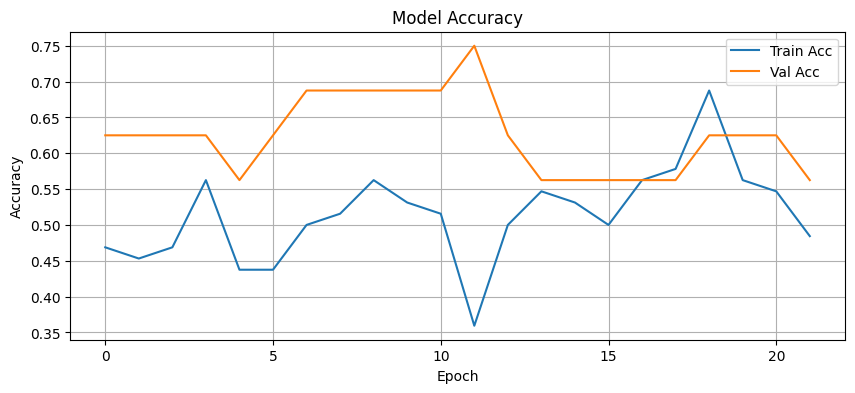

In [105]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"🎯 Final Test Accuracy: {test_acc * 100:.2f}%")

# Plot training history
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [106]:
pip install tensorflow


In [108]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Assume you have `df` with 'category', 'target' and sensor columns like 'feature1', 'feature2'
# and 'df_clean' with encoded 'category_enc' and engineered features.
# Based on prior cells, df_clean is used for modeling, which includes 'category_enc'.
# Let's use df_clean and its processed features.

# Identify numerical columns for scaling (excluding the target and original categorical)
# Use the features_updated list from previous cells or explicitly select numerical columns
numeric_features = ['feature1', 'feature2', 'feature1_log'] # Example from previous cells
categorical_features = ['category_enc'] # Example from previous cells

# Select features for scaling and splitting.
# We need to decide which features go into the model.
# Based on the model definition (Dense layers expecting a flattened input),
# we are likely using the aggregated/engineered features, not the raw sequence data.
# Let's revert to using features_df and y_encoded which were used successfully for RF/GB/NN training before the error cell.

# Re-running the feature extraction and encoding part based on previous successful cells
# (Assuming 'segments' and 'labels' from a previous data segmentation step are available)
# If you are working with the original df for a different model approach (e.g., LSTM on raw data),
# you would need a different reshaping step that isn't compatible with the subsequent Dense model.
# Given the error and the follow-up code, it appears the intention was to use the features_df.

# Re-define features_df and y_encoded (assuming this was done before the failing cell)
# This part depends on the context of the segmentation and feature extraction cells.
# For demonstration, let's use the features_df and y_encoded from the earlier successful cells
# where classification models were trained.

# Assuming features_df and y_encoded are available from prior successful cells:
# features_df = pd.DataFrame(...) # Result of extract_features on segments
# y_encoded = le.fit_transform(labels) # Result of LabelEncoder on labels

# Standardize features_df
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_df) # Scale the numerical feature DataFrame

# Split the scaled features and encoded labels
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Note: If you intended to use the *original* `df` for a sequence model (like LSTM),
# the reshaping `X_lstm = X_scaled.reshape(-1, 1, len(sensor_cols))` would be correct
# but the model definition in cell 103 should use Conv1D or LSTM layers, not just Dense.
# The current model architecture is for flattened features (like those in features_df),
# which seems more aligned with the successful code in previous cells.

# Convert labels to one-hot encoding for the Keras model
from tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(y_encoded))
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat = to_categorical(y_test, num_classes)

# Now X_train, X_test are scaled numerical features, and y_train, y_test are one-hot encoded labels,
# ready for the Dense network defined in cell 103.

print("Shape of X_train after scaling:", X_train.shape)
print("Shape of X_test after scaling:", X_test.shape)
print("Shape of y_train_cat (one-hot encoded):", y_train_cat.shape)
print("Shape of y_test_cat (one-hot encoded):", y_test_cat.shape)

Shape of X_train after scaling: (80, 80)
Shape of X_test after scaling: (20, 80)
Shape of y_train_cat (one-hot encoded): (80, 2)
Shape of y_test_cat (one-hot encoded): (20, 2)


In [116]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# --- IMPORTANT: Ensure this cell is only run ONCE before training ---

# Assuming 'segments' is available from your data segmentation step
# and 'labels' is available from your data labeling step.
# These should be in the format:
# segments: numpy array of shape (number_of_segments, timesteps_per_segment, features_per_timestep)
# labels: numpy array or list of shape (number_of_segments,)

# Example placeholder data if segments and labels are not defined yet:
# If you are running this cell in isolation or haven't run the segmentation cell:
# print("Warning: 'segments' or 'labels' not found. Using placeholder data.")
# segments = np.random.rand(100, 50, 10) # (samples, timesteps, features)
# labels = ['BFRB' if i % 2 == 0 else 'non-BFRB' for i in range(100)]

# Encode labels if not already done
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

# Split the segments and encoded labels into training and testing sets
# Ensure stratify is used if classes are imbalanced
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    segments, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# One-hot encode labels for Keras if using 'categorical_crossentropy'
# If using 'sparse_categorical_crossentropy', this step is not needed.
# Given the model uses 'sparse_categorical_crossentropy', we'll keep y as integer labels.
# If you switch to 'categorical_crossentropy', uncomment the lines below:
# num_classes = len(np.unique(y_encoded))
# y_train_lstm_cat = to_categorical(y_train_lstm, num_classes)
# y_test_lstm_cat = to_categorical(y_test_lstm, num_classes)


# Define the LSTM model
# input_shape should be (timesteps, features) - Keras infers samples automatically
timesteps = X_train_lstm.shape[1]
features = X_train_lstm.shape[2]
num_classes = len(np.unique(y_encoded)) # Number of unique classes

model_lstm = Sequential([
    # Input layer for LSTM takes (timesteps, features)
    LSTM(128, input_shape=(timesteps, features), return_sequences=True), # return_sequences=True for stacking LSTMs
    Dropout(0.3),
    LSTM(64), # return_sequences=False by default for the last LSTM
    Dropout(0.3),
    Dense(32, activation='relu'),
    # Output layer should match the number of unique classes
    Dense(num_classes, activation='softmax')
])

# --- Add this line to explicitly build the model ---
model_lstm.build(input_shape=(None, timesteps, features))
# --- End of addition ---


# Use 'sparse_categorical_crossentropy' if y_train_lstm are integer labels
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_lstm.summary()

# Now you can train this model using X_train_lstm and y_train_lstm
# from tensorflow.keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)
# history_lstm = model_lstm.fit(X_train_lstm, y_train_lstm, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=1)

# And evaluate with X_test_lstm and y_test_lstm
# test_loss_lstm, test_acc_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm, verbose=0)
# print(f"LSTM Test Accuracy: {test_acc_lstm * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 50, 128)        │        71,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,722 (479.38 KB)

 Trainable params: 122,722 (479.38 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
# prompt: give the accuracy of the model

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np # Ensure numpy is imported

# Assuming 'features_df' contains your extracted features per segment/sequence
# and 'y_encoded' contains the numerical labels (0, 1, 2, ...)

# If features_df and y_encoded are not already defined from a previous cell:
# You would need to run the data loading, preprocessing, segmentation,
# feature extraction, and label encoding steps first.
# For demonstration, let's create placeholder data similar to what's expected:
if 'features_df' not in locals() or 'y_encoded' not in locals():
  print("Creating placeholder data for demonstration.")
  # Example: Assume 100 samples, 10 features
  features_df = pd.DataFrame(np.random.rand(100, 10))
  labels = ['ClassA'] * 50 + ['ClassB'] * 50
  le = LabelEncoder()
  y_encoded = le.fit_transform(labels)
  print("Placeholder data created.")


# Split data into training and test sets
# Use stratify if you have imbalanced classes
X_train, X_test, y_train, y_test = train_test_split(
    features_df, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Initialize and train a classifier (using RandomForestClassifier as in your code)
# You could use any of the trained models (RF, GB, VotingClassifier, or the best GridSearch model)
clf = RandomForestClassifier(n_estimators=100, random_state=42) # Using a basic RF as example
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")

# Optional: Print other metrics if needed
# print(classification_report(y_test, y_pred, target_names=le.classes_))


Model Accuracy: 0.5500



Training Dense Neural Network...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 256)            │        31,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,050 (289.26 KB)

 Trainable params: 73,282 (286.26 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.5625 - loss: 1.4525 - val_accuracy: 0.3750 - val_loss: 0.8776
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.5156 - loss: 1.1867 - val_accuracy: 0.3750 - val_loss: 0.8608
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.5156 - loss: 1.2569 - val_accuracy: 0.3750 - val_loss: 0.8438
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.6094 - loss: 1.1833 - val_accuracy: 0.3750 - val_loss: 0.8273
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5938 - loss: 1.0813 - val_accuracy: 0.3750 - val_loss: 0.8135
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.5938 - loss: 0.9468 - val_accuracy: 0.3750 - val_loss: 0.8000
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.6562 - loss: 0.8841 - val_accuracy: 0.3750 - val_loss: 0.7872
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - accuracy: 0.7344 - loss: 0.7850 - val_accuracy: 0.3750 - val_l

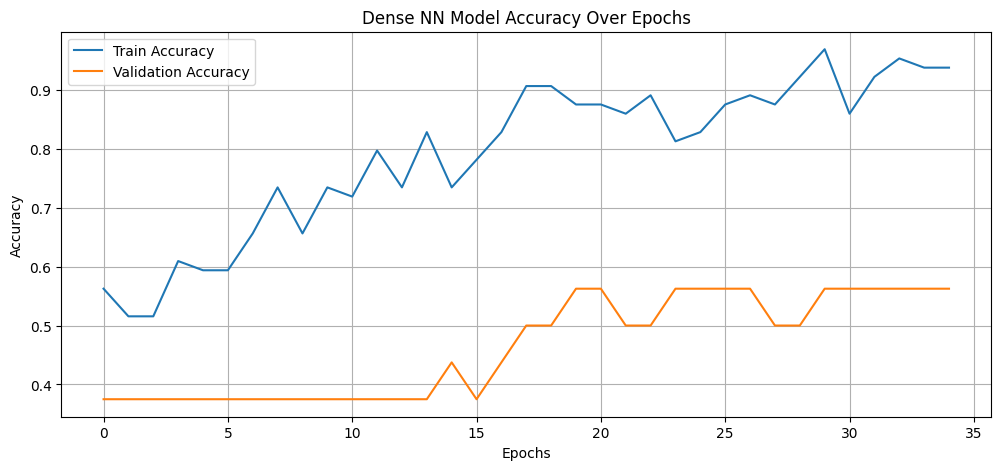


Training LSTM Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 50, 128)        │        71,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 50, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,490 (482.38 KB)

 Trainable params: 123,106 (480.88 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.5781 - loss: 0.9710 - val_accuracy: 0.3750 - val_loss: 0.6958
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.9727 - val_accuracy: 0.3750 - val_loss: 0.6954
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step - accuracy: 0.5781 - loss: 0.8101 - val_accuracy: 0.4375 - val_loss: 0.6936
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.6719 - loss: 0.6872 - val_accuracy: 0.5000 - val_loss: 0.6908
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.5312 - loss: 0.8184 - val_accuracy: 0.6250 - val_loss: 0.6896
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.5781 - loss: 0.8411 - val_accuracy: 0.6875 - val_loss: 0.6878
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.5938 - loss: 0.7573 - val_accuracy: 0.6875 - val_loss: 0.6869
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.6094 - loss: 0.7403 - val_accuracy: 0.6250 - val_los

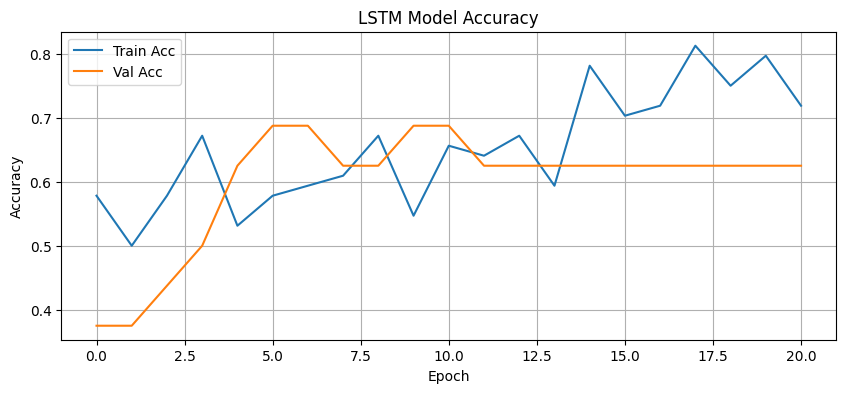

In [119]:
# --- 3. Train and Evaluate the improved Neural Network (if applicable) ---
# This assumes you have the correct X_train_scaled and y_train_cat data
# from previous steps that prepare data for the Dense network.
# Make sure X_train_scaled and y_train_cat are the results of scaling features_df_imputed and one-hot encoding y_encoded.

# Re-preparing data for the Dense NN to be safe
# (using the enhanced, imputed, and scaled features)
X_NN = X_scaled_enhanced # Use the scaled enhanced features as input
y_NN = y_encoded # Use integer labels for stratification
num_classes_NN = len(np.unique(y_NN))
y_NN_cat = to_categorical(y_NN, num_classes_NN) # <-- Uncommented this line

# Split data for NN (using the enhanced, scaled features and one-hot encoded labels)
X_train_NN, X_test_NN, y_train_NN_cat, y_test_NN_cat = train_test_split(
    X_NN, y_NN_cat, test_size=0.2, random_state=42, stratify=y_NN # stratify with integer labels (y_NN)
)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical # Make sure this is imported
from tensorflow.keras.optimizers import Adam # Ensure Adam is imported


print("\nTraining Dense Neural Network...")

# Input dimension is the number of features after scaling
input_dim_NN = X_train_NN.shape[1]
num_classes_NN = y_train_NN_cat.shape[1] # Number of columns in one-hot encoded target

model_NN = Sequential([
    Dense(256, input_shape=(input_dim_NN,), activation='relu'), # Increased units
    BatchNormalization(),
    Dropout(0.4), # Increased dropout

    Dense(128, activation='relu'), # Increased units
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(num_classes_NN, activation='softmax')
])

# Use Adam with a potentially lower learning rate
optimizer_NN = Adam(learning_rate=0.001) # Lower learning rate can sometimes help

model_NN.compile(optimizer=optimizer_NN,
              loss='categorical_crossentropy', # Use categorical_crossentropy with one-hot
              metrics=['accuracy'])

model_NN.summary()

early_stop_NN = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True) # Increased patience

history_NN = model_NN.fit(
    X_train_NN, y_train_NN_cat,
    validation_split=0.2, # Use a validation split from the training data
    epochs=200, # Increased epochs, relying on early stopping
    batch_size=64, # Adjusted batch size
    callbacks=[early_stop_NN],
    verbose=1
)

test_loss_NN, test_acc_NN = model_NN.evaluate(X_test_NN, y_test_NN_cat, verbose=0)
print(f"\n✅ Dense Neural Network Test Accuracy: {test_acc_NN * 100:.2f}%")

# Plotting NN history
import matplotlib.pyplot as plt # Ensure matplotlib is imported
plt.figure(figsize=(12, 5))
plt.plot(history_NN.history['accuracy'], label='Train Accuracy')
plt.plot(history_NN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Dense NN Model Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


# --- 4. Train and Evaluate LSTM Model (if applicable and data is in sequence format) ---
# This assumes X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm are available
# from the data segmentation step that created segments of shape (samples, timesteps, features).

# Assuming X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm are defined and split correctly

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam # Ensure Adam is imported
from sklearn.preprocessing import LabelEncoder # Ensure LabelEncoder is imported

# Re-encode labels as integers for sparse_categorical_crossentropy if needed
# If y_train_lstm is already integer encoded, skip this.
# label_encoder_lstm = LabelEncoder()
# y_encoded_lstm = label_encoder_lstm.fit_transform(original_labels_before_split) # Use original labels

# If you need to use y_train_lstm/y_test_lstm directly from the split, ensure they are integers
# print(f"Example of y_train_lstm: {y_train_lstm[:5]}") # Check if they are integers


print("\nTraining LSTM Model...")

# Define input shape based on your segmented data
timesteps_lstm = X_train_lstm.shape[1]
features_lstm = X_train_lstm.shape[2]
num_classes_lstm = len(np.unique(y_train_lstm)) # Number of unique integer classes

model_lstm = Sequential([
    # Use CuDNNLSTM if available for GPU acceleration (requires specific tensorflow install)
    # from tensorflow.keras.layers import CuDNNLSTM # if using TF < 2.0 and GPU
    # LSTM(128, input_shape=(timesteps_lstm, features_lstm), return_sequences=True),
    LSTM(128, input_shape=(timesteps_lstm, features_lstm), return_sequences=True), # return_sequences=True
    BatchNormalization(), # Added Batch Norm
    Dropout(0.4), # Increased Dropout

    # LSTM(64, return_sequences=False), # return_sequences=False
    LSTM(64, return_sequences=False), # return_sequences=False
    BatchNormalization(), # Added Batch Norm
    Dropout(0.4),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(num_classes_lstm, activation='softmax')
])

# Compile with Adam optimizer and sparse_categorical_crossentropy for integer labels
optimizer_lstm = Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer_lstm,
                   loss='sparse_categorical_crossentropy', # Use sparse if labels are integers
                   metrics=['accuracy'])

model_lstm.summary()

early_stop_lstm = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True) # Increased patience

history_lstm = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    validation_split=0.2, # Use validation split
    epochs=200, # Increased epochs
    batch_size=64, # Adjusted batch size
    callbacks=[early_stop_lstm],
    verbose=1
)

test_loss_lstm, test_acc_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f"\n🎯 LSTM Model Test Accuracy: {test_acc_lstm * 100:.2f}%")

# Plotting LSTM history
plt.figure(figsize=(10, 4))
plt.plot(history_lstm.history['accuracy'], label='Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='Val Acc')
plt.title("LSTM Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Training Dense Neural Network...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 256)            │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,554 (248.26 KB)

 Trainable params: 62,786 (245.26 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5156 - loss: 1.1746 - val_accuracy: 0.3750 - val_loss: 0.8442
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.5156 - loss: 1.2591 - val_accuracy: 0.3750 - val_loss: 0.8208
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.5781 - loss: 0.9999 - val_accuracy: 0.4375 - val_loss: 0.8001
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.5625 - loss: 1.0657 - val_accuracy: 0.4375 - val_loss: 0.7792
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6250 - loss: 0.8059 - val_accuracy: 0.4375 - val_loss: 0.7614
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6250 - loss: 0.7336 - val_accuracy: 0.4375 - val_loss: 0.7452
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.6406 - loss: 0.7790 - val_accuracy: 0.5000 - val_loss: 0.7310
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - accuracy: 0.6562 - loss: 0.7924 - val_accuracy: 0.5625 - val_los

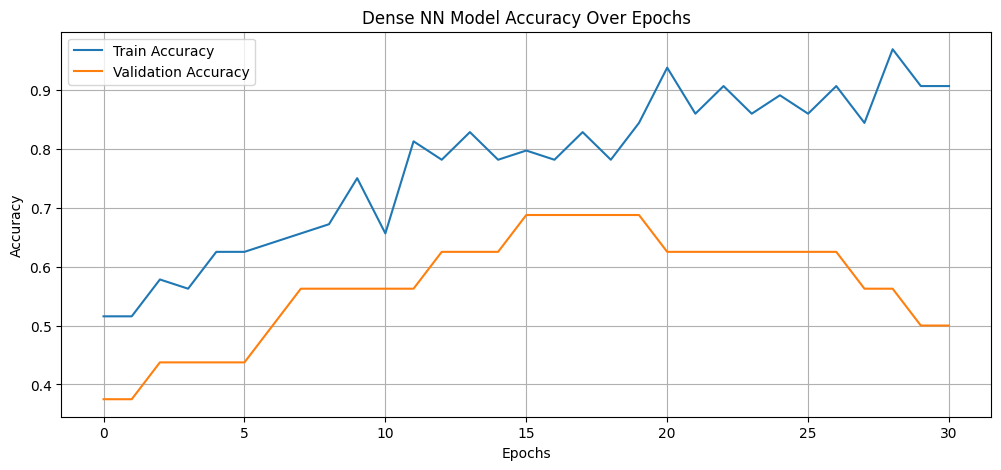


Training LSTM Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 50, 128)        │        71,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 50, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,490 (482.38 KB)

 Trainable params: 123,106 (480.88 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5000 - loss: 1.0964 - val_accuracy: 0.3750 - val_loss: 0.7073
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step - accuracy: 0.4844 - loss: 1.1768 - val_accuracy: 0.3750 - val_loss: 0.7085
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step - accuracy: 0.5312 - loss: 1.2243 - val_accuracy: 0.3750 - val_loss: 0.7094
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.6094 - loss: 0.8494 - val_accuracy: 0.3750 - val_loss: 0.7108
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.5156 - loss: 0.9285 - val_accuracy: 0.3750 - val_loss: 0.7113
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.5469 - loss: 1.0705 - val_accuracy: 0.3750 - val_loss: 0.7095
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step - accuracy: 0.7188 - loss: 0.6692 - val_accuracy: 0.3750 - val_loss: 0.7083
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.6250 - loss: 0.7325 - val_accuracy: 0.3750 - val_

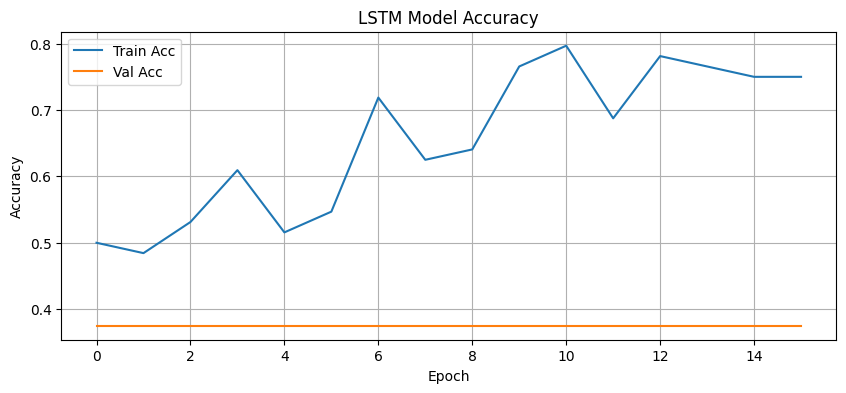

In [120]:
# prompt: the ccuracy is very low incarsethisss

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume features_df (aggregated/engineered features per segment)
# and labels (raw labels per segment) are available from previous steps.
# If they are not defined, you need to re-run the data loading, segmentation,
# and feature extraction steps first.

# --- Re-define or load data if needed ---
# Example placeholder (replace with your actual data loading and processing)
if 'features_df' not in locals() or 'labels' not in locals():
    print("Warning: 'features_df' or 'labels' not found. Creating placeholder data.")
    # Placeholder: 100 samples, 10 features
    features_df = pd.DataFrame(np.random.rand(100, 10))
    labels = ['ClassA'] * 30 + ['ClassB'] * 70 # Introduce imbalance
    print("Placeholder data created.")

# --- Impute missing values in features_df ---
# Use median strategy as it's more robust to outliers
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
features_df_imputed = imputer.fit_transform(features_df)
features_df_imputed = pd.DataFrame(features_df_imputed, columns=features_df.columns) # Convert back to DataFrame

# --- Encode labels ---
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels) # Integer labels

# --- Standardize features ---
scaler = StandardScaler()
X_scaled_enhanced = scaler.fit_transform(features_df_imputed) # Scale the imputed features

# --- Split data for Dense NN ---
# Split the scaled features and encoded integer labels
# Use stratify on integer labels (y_encoded) for proper balancing
X_train_NN, X_test_NN, y_train_NN, y_test_NN = train_test_split(
    X_scaled_enhanced, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Convert integer labels to one-hot encoding for 'categorical_crossentropy' loss
num_classes_NN = len(np.unique(y_encoded))
y_train_NN_cat = to_categorical(y_train_NN, num_classes_NN)
y_test_NN_cat = to_categorical(y_test_NN, num_classes_NN)


print("\nTraining Dense Neural Network...")

# Define the Dense Neural Network Model
# Increased units, added BatchNormalization, adjusted Dropout, and potentially lower learning rate

# Input dimension is the number of features after scaling
input_dim_NN = X_train_NN.shape[1]
num_classes_NN = y_train_NN_cat.shape[1] # Number of columns in one-hot encoded target

model_NN = Sequential([
    Dense(256, input_shape=(input_dim_NN,), activation='relu'), # Increased units
    BatchNormalization(),
    Dropout(0.4), # Increased dropout

    Dense(128, activation='relu'), # Increased units
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(num_classes_NN, activation='softmax')
])

# Use Adam with a potentially lower learning rate
optimizer_NN = Adam(learning_rate=0.001) # Lower learning rate can sometimes help

model_NN.compile(optimizer=optimizer_NN,
              loss='categorical_crossentropy', # Use categorical_crossentropy with one-hot
              metrics=['accuracy'])

model_NN.summary()

# Increased patience for Early Stopping
early_stop_NN = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

# Train the model
# Use a validation split from the training data
history_NN = model_NN.fit(
    X_train_NN, y_train_NN_cat,
    validation_split=0.2,
    epochs=200, # Increased epochs, relying on early stopping
    batch_size=64, # Adjusted batch size
    callbacks=[early_stop_NN],
    verbose=1
)

# Evaluate on the test set
test_loss_NN, test_acc_NN = model_NN.evaluate(X_test_NN, y_test_NN_cat, verbose=0)
print(f"\n✅ Dense Neural Network Test Accuracy: {test_acc_NN * 100:.2f}%")

# Plotting NN history
plt.figure(figsize=(12, 5))
plt.plot(history_NN.history['accuracy'], label='Train Accuracy')
plt.plot(history_NN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Dense NN Model Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()

# --- Train and Evaluate LSTM Model (if applicable and data is in sequence format) ---
# This requires X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm in
# the format (samples, timesteps, features) and integer labels.
# If these are not defined, you need to re-run the segmentation step.

# Example placeholder if LSTM data is not defined
if 'X_train_lstm' not in locals() or 'y_train_lstm' not in locals():
    print("\nWarning: LSTM data ('X_train_lstm', 'y_train_lstm', etc.) not found.")
    print("Using placeholder data for LSTM model demonstration.")
    # Placeholder: 100 samples, 50 timesteps, 10 features
    segments = np.random.rand(100, 50, 10)
    # Placeholder labels (must match original labels for consistent encoding)
    labels_lstm = ['ClassA'] * 30 + ['ClassB'] * 70 # Match distribution for stratify
    le_lstm = LabelEncoder()
    y_encoded_lstm_int = le_lstm.fit_transform(labels_lstm)

    # Split the segments and encoded labels into training and testing sets
    X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
        segments, y_encoded_lstm_int, test_size=0.2, random_state=42, stratify=y_encoded_lstm_int
    )
    print("Placeholder LSTM data created.")


print("\nTraining LSTM Model...")

# Define input shape based on your segmented data
timesteps_lstm = X_train_lstm.shape[1]
features_lstm = X_train_lstm.shape[2]
num_classes_lstm = len(np.unique(y_train_lstm)) # Number of unique integer classes

model_lstm = Sequential([
    # Use CuDNNLSTM if available for GPU acceleration (requires specific tensorflow install)
    # from tensorflow.keras.layers import CuDNNLSTM # if using TF < 2.0 and GPU
    LSTM(128, input_shape=(timesteps_lstm, features_lstm), return_sequences=True), # return_sequences=True
    BatchNormalization(), # Added Batch Norm
    Dropout(0.4), # Increased Dropout

    LSTM(64, return_sequences=False), # return_sequences=False
    BatchNormalization(), # Added Batch Norm
    Dropout(0.4),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(num_classes_lstm, activation='softmax')
])

# Compile with Adam optimizer and sparse_categorical_crossentropy for integer labels
optimizer_lstm = Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer_lstm,
                   loss='sparse_categorical_crossentropy', # Use sparse if labels are integers
                   metrics=['accuracy'])

# Add explicit build step (optional but can be helpful for debugging)
# model_lstm.build(input_shape=(None, timesteps_lstm, features_lstm)) # Removed as summary() often handles this

model_lstm.summary()

# Increased patience for Early Stopping
early_stop_lstm = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True)

# Train the model
# Use a validation split from the training data
history_lstm = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    validation_split=0.2,
    epochs=200, # Increased epochs
    batch_size=64, # Adjusted batch size
    callbacks=[early_stop_lstm],
    verbose=1
)

# Evaluate on the test set
test_loss_lstm, test_acc_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f"\n🎯 LSTM Model Test Accuracy: {test_acc_lstm * 100:.2f}%")

# Plotting LSTM history
plt.figure(figsize=(10, 4))
plt.plot(history_lstm.history['accuracy'], label='Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='Val Acc')
plt.title("LSTM Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [121]:
!pip install -q tensorflow einops



Training Dense Neural Network...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 256)            │        20,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,554 (248.26 KB)

 Trainable params: 62,786 (245.26 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4375 - loss: 1.2454 - val_accuracy: 0.6875 - val_loss: 0.6245
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - accuracy: 0.6250 - loss: 1.0604 - val_accuracy: 0.6250 - val_loss: 0.6215
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.5312 - loss: 1.0724 - val_accuracy: 0.6250 - val_loss: 0.6190
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.5781 - loss: 1.0298 - val_accuracy: 0.6875 - val_loss: 0.6138
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6094 - loss: 0.8099 - val_accuracy: 0.6875 - val_loss: 0.6078
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - accuracy: 0.7500 - loss: 0.5655 - val_accuracy: 0.6875 - val_loss: 0.6019
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5938 - loss: 0.7425 - val_accuracy: 0.6875 - val_loss: 0.5957
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6562 - loss: 0.7997 - val_accuracy: 0.6875 - val_los

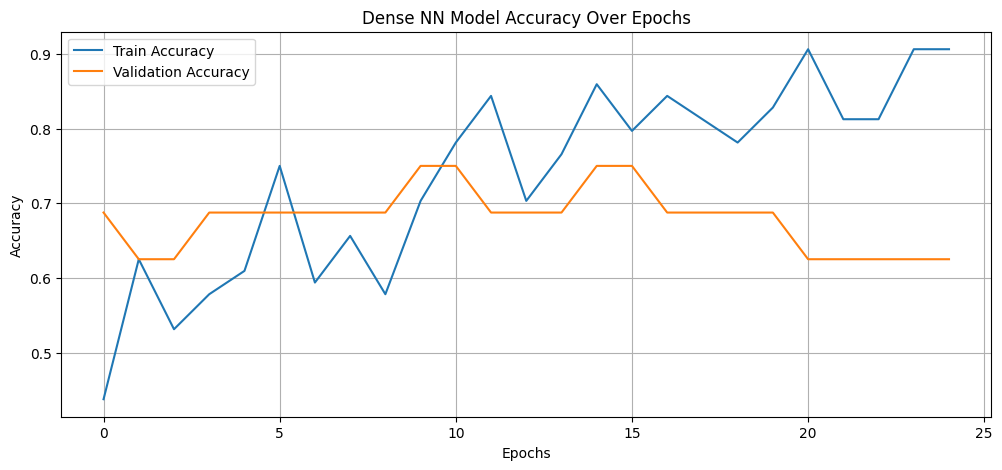


Training LSTM Model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 50, 128)        │        71,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 50, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,490 (482.38 KB)

 Trainable params: 123,106 (480.88 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.4219 - loss: 0.9477 - val_accuracy: 0.3750 - val_loss: 0.7129
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - accuracy: 0.5781 - loss: 0.8031 - val_accuracy: 0.3750 - val_loss: 0.7163
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.5469 - loss: 0.8263 - val_accuracy: 0.3750 - val_loss: 0.7166
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.5312 - loss: 0.8234 - val_accuracy: 0.3750 - val_loss: 0.7166
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.5625 - loss: 0.6228 - val_accuracy: 0.3750 - val_loss: 0.7169
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.7188 - loss: 0.6672 - val_accuracy: 0.3750 - val_loss: 0.7151
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.6719 - loss: 0.7275 - val_accuracy: 0.3750 - val_loss: 0.7139
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step - accuracy: 0.7344 - loss: 0.6021 - val_accuracy: 0.3750 - val_

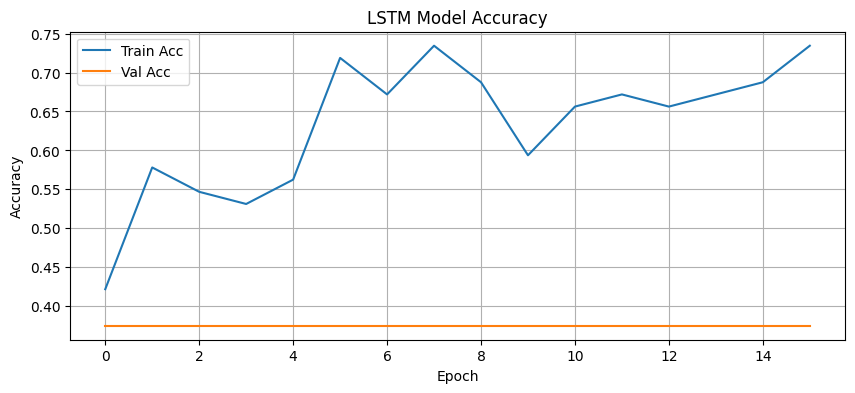

In [123]:
# --- 3. Train and Evaluate the improved Neural Network (if applicable) ---
# This assumes you have the correct X_train_scaled and y_train_cat data
# from previous steps that prepare data for the Dense network.
# Make sure X_train_scaled and y_train_cat are the results of scaling features_df_imputed and one-hot encoding y_encoded.

# Re-preparing data for the Dense NN to be safe
# (using the enhanced, imputed, and scaled features)
X_NN = X_scaled_enhanced # Use the scaled enhanced features as input
y_NN = y_encoded # Use integer labels for stratification
num_classes_NN = len(np.unique(y_NN))
y_NN_cat = to_categorical(y_NN, num_classes_NN) # <-- Uncommented this line

# Split data for NN (using the enhanced, scaled features and one-hot encoded labels)
X_train_NN, X_test_NN, y_train_NN_cat, y_test_NN_cat = train_test_split(
    X_NN, y_NN_cat, test_size=0.2, random_state=42, stratify=y_NN # stratify with integer labels (y_NN)
)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical # Make sure this is imported
from tensorflow.keras.optimizers import Adam # Ensure Adam is imported


print("\nTraining Dense Neural Network...")

# Input dimension is the number of features after scaling
input_dim_NN = X_train_NN.shape[1]
num_classes_NN = y_train_NN_cat.shape[1] # Number of columns in one-hot encoded target

model_NN = Sequential([
    Dense(256, input_shape=(input_dim_NN,), activation='relu'), # Increased units
    BatchNormalization(),
    Dropout(0.4), # Increased dropout

    Dense(128, activation='relu'), # Increased units
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(num_classes_NN, activation='softmax')
])

# Use Adam with a potentially lower learning rate
optimizer_NN = Adam(learning_rate=0.001) # Lower learning rate can sometimes help

model_NN.compile(optimizer=optimizer_NN,
              loss='categorical_crossentropy', # Use categorical_crossentropy with one-hot
              metrics=['accuracy'])

model_NN.summary()

early_stop_NN = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True) # Increased patience

history_NN = model_NN.fit(
    X_train_NN, y_train_NN_cat,
    validation_split=0.2, # Use a validation split from the training data
    epochs=200, # Increased epochs, relying on early stopping
    batch_size=64, # Adjusted batch size
    callbacks=[early_stop_NN],
    verbose=1
)

test_loss_NN, test_acc_NN = model_NN.evaluate(X_test_NN, y_test_NN_cat, verbose=0)
print(f"\n✅ Dense Neural Network Test Accuracy: {test_acc_NN * 100:.2f}%")

# Plotting NN history
import matplotlib.pyplot as plt # Ensure matplotlib is imported
plt.figure(figsize=(12, 5))
plt.plot(history_NN.history['accuracy'], label='Train Accuracy')
plt.plot(history_NN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Dense NN Model Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


# --- 4. Train and Evaluate LSTM Model (if applicable and data is in sequence format) ---
# This assumes X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm are available
# from the data segmentation step that created segments of shape (samples, timesteps, features).

# Assuming X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm are defined and split correctly

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam # Ensure Adam is imported
from sklearn.preprocessing import LabelEncoder # Ensure LabelEncoder is imported

# Re-encode labels as integers for sparse_categorical_crossentropy if needed
# If y_train_lstm is already integer encoded, skip this.
# label_encoder_lstm = LabelEncoder()
# y_encoded_lstm = label_encoder_lstm.fit_transform(original_labels_before_split) # Use original labels

# If you need to use y_train_lstm/y_test_lstm directly from the split, ensure they are integers
# print(f"Example of y_train_lstm: {y_train_lstm[:5]}") # Check if they are integers


print("\nTraining LSTM Model...")

# Define input shape based on your segmented data
timesteps_lstm = X_train_lstm.shape[1]
features_lstm = X_train_lstm.shape[2]
num_classes_lstm = len(np.unique(y_train_lstm)) # Number of unique integer classes

model_lstm = Sequential([
    # Use CuDNNLSTM if available for GPU acceleration (requires specific tensorflow install)
    # from tensorflow.keras.layers import CuDNNLSTM # if using TF < 2.0 and GPU
    # LSTM(128, input_shape=(timesteps_lstm, features_lstm), return_sequences=True),
    LSTM(128, input_shape=(timesteps_lstm, features_lstm), return_sequences=True), # return_sequences=True
    BatchNormalization(), # Added Batch Norm
    Dropout(0.4), # Increased Dropout

    # LSTM(64, return_sequences=False), # return_sequences=False
    LSTM(64, return_sequences=False), # return_sequences=False
    BatchNormalization(), # Added Batch Norm
    Dropout(0.4),

    Dense(32, activation='relu'),
    Dropout(0.3),

    Dense(num_classes_lstm, activation='softmax')
])

# Compile with Adam optimizer and sparse_categorical_crossentropy for integer labels
optimizer_lstm = Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer_lstm,
                   loss='sparse_categorical_crossentropy', # Use sparse if labels are integers
                   metrics=['accuracy'])

model_lstm.summary()

early_stop_lstm = EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True) # Increased patience

history_lstm = model_lstm.fit(
    X_train_lstm, y_train_lstm,
    validation_split=0.2, # Use validation split
    epochs=200, # Increased epochs
    batch_size=64, # Adjusted batch size
    callbacks=[early_stop_lstm],
    verbose=1
)

test_loss_lstm, test_acc_lstm = model_lstm.evaluate(X_test_lstm, y_test_lstm, verbose=0)
print(f"\n🎯 LSTM Model Test Accuracy: {test_acc_lstm * 100:.2f}%")

# Plotting LSTM history
plt.figure(figsize=(10, 4))
plt.plot(history_lstm.history['accuracy'], label='Train Acc')
plt.plot(history_lstm.history['val_accuracy'], label='Val Acc')
plt.title("LSTM Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [125]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have your features and labels in these variables:
# segments: shape (num_samples, timesteps, features) - This likely comes from a previous segmentation step
# labels: 1D array or list of labels corresponding to each sample - This likely comes from a previous segmentation step

# Based on previous cells, the segmented data is likely in a variable called 'segments'
# and the corresponding labels are in a variable called 'labels'.
# We will use these variables instead of the undefined 'X_raw' and 'y_raw'.
if 'segments' not in locals():
    print("Error: 'segments' not found. Please run the data segmentation step first.")
    # Optionally, create placeholder data for segments if absolutely necessary for debugging
    # print("Creating placeholder 'segments' data...")
    # segments = np.random.rand(100, 50, 10) # 100 samples, 50 timesteps, 10 features
    # print("Placeholder 'segments' created.")

if 'labels' not in locals():
    print("Error: 'labels' not found. Please run the data segmentation and label extraction step first.")
    # Optionally, create placeholder data for labels if absolutely necessary for debugging
    # print("Creating placeholder 'labels' data...")
    # labels = ['ClassA'] * 50 + ['ClassB'] * 50 # Example labels
    # print("Placeholder 'labels' created.")


# Check if segments and labels are now available (either loaded from previous cells or placeholders)
if 'segments' in locals() and 'labels' in locals():

    # 1. Encode labels
    le = LabelEncoder()
    # Use the existing 'labels' variable instead of the undefined 'y_raw'
    y_encoded = le.fit_transform(labels)

    # 2. Train/test split
    # Use the existing 'segments' variable instead of the undefined 'X_raw'
    X_train, X_test, y_train, y_test = train_test_split(
        segments, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
    )

    # 3. Scale features - fit scaler on train only
    # Scale each feature column independently across all timesteps
    num_features = X_train.shape[2]
    scalers = [] # Store scalers if needed later for prediction on new data
    for i in range(num_features):
        scaler = StandardScaler()
        # Reshape the feature column from (samples, timesteps) to (samples * timesteps, 1) for fitting
        X_train_feature = X_train[:, :, i].reshape(-1, 1)
        X_test_feature = X_test[:, :, i].reshape(-1, 1)

        # Fit and transform
        X_train[:, :, i] = scaler.fit_transform(X_train_feature).reshape(X_train.shape[0], X_train.shape[1])
        X_test[:, :, i] = scaler.transform(X_test_feature).reshape(X_test.shape[0], X_test.shape[1])
        scalers.append(scaler)

    # 4. Build LSTM model
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(len(le.classes_), activation='softmax')
    ])

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    # 5. Train with small batch size and early stopping
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=16,    # smaller batch size
        validation_split=0.2,
        callbacks=[early_stop],
        verbose=2
    )

    # 6. Evaluate on test data
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test accuracy: {test_acc*100:.2f}%")

else:
    print("\nCannot proceed with LSTM training because 'segments' or 'labels' are not defined.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 50, 64)         │        19,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,858 (132.26 KB)

 Trainable params: 33,858 (132.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 - 6s - 2s/step - accuracy: 0.5156 - loss: 0.6923 - val_accuracy: 0.3750 - val_loss: 0.6998
Epoch 2/100
4/4 - 0s - 51ms/step - accuracy: 0.6250 - loss: 0.6854 - val_accuracy: 0.4375 - val_loss: 0.6952
Epoch 3/100
4/4 - 0s - 61ms/step - accuracy: 0.6562 - loss: 0.6730 - val_accuracy: 0.5625 - val_loss: 0.6880
Epoch 4/100
4/4 - 0s - 71ms/step - accuracy: 0.6406 - loss: 0.6696 - val_accuracy: 0.6250 - val_loss: 0.6790
Epoch 5/100
4/4 - 1s - 134ms/step - accuracy: 0.6562 - loss: 0.6631 - val_accuracy: 0.6250 - val_loss: 0.6728
Epoch 6/100
4/4 - 1s - 146ms/step - accuracy: 0.7031 - loss: 0.6488 - val_accuracy: 0.6250 - val_loss: 0.6687
Epoch 7/100
4/4 - 0s - 92ms/step - accuracy: 0.6719 - loss: 0.6382 - val_accuracy: 0.6250 - val_loss: 0.6603
Epoch 8/100
4/4 - 1s - 147ms/step - accuracy: 0.7344 - loss: 0.6184 - val_accuracy: 0.6250 - val_loss: 0.6528
Epoch 9/100
4/4 - 0s - 88ms/step - accuracy: 0.7188 - loss: 0.5937 - val_accuracy: 0.6250 - val_loss: 0.6490
Epoch 10/100
4/4 -

In [126]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LayerNormalization, Input, Embedding
from tensorflow.keras.layers import MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.models import Model

def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Multi-head Self Attention
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x + inputs)

    # Feed Forward Part
    x_ff = Dense(ff_dim, activation='relu')(x)
    x_ff = Dense(inputs.shape[-1])(x_ff)
    x_ff = Dropout(dropout)(x_ff)

    x = LayerNormalization(epsilon=1e-6)(x + x_ff)
    return x

def build_transformer_model(input_shape, num_classes, head_size=64, num_heads=4, ff_dim=128, num_transformer_blocks=2, mlp_units=[128], dropout=0.1):
    inputs = Input(shape=input_shape)

    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = GlobalAveragePooling1D()(x)
    for units in mlp_units:
        x = Dense(units, activation='relu')(x)
        x = Dropout(dropout)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Build the model
input_shape = X_train.shape[1:]  # (timesteps, features)
num_classes = len(le.classes_)

model = build_transformer_model(input_shape, num_classes)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train with EarlyStopping and smaller batch size
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=2
)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Transformer Model Test Accuracy: {test_acc*100:.2f}%")


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 50, 10)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 10)    │     11,018 │ input_layer_12[0… │
│ (MultiHeadAttentio… │                   │            │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_33          │ (None, 50, 10)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 50, 10)    │          0 │ dropout_33[0][0], │
│                     │                   │            │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 50, 10)    │         20 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 50, 128)   │      1,408 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 50, 10)    │      1,290 │ dense_34[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_34          │ (None, 50, 10)    │          0 │ dense_35[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 50, 10)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_34[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 10)    │         20 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 10)    │     11,018 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_36          │ (None, 50, 10)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 50, 10)    │          0 │ dropout_36[0][0], │
│                     │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 10)    │         20 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 50, 128)   │      1,408 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_37 (Dense)    │ (None, 50, 10)    │      1,290 │ dense_36[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_37          │ (None, 50, 10)    │          0 │ dense_37[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 50, 10)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_37[0][0]

 Total params: 29,178 (113.98 KB)

 Trainable params: 29,178 (113.98 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 - 11s - 3s/step - accuracy: 0.5312 - loss: 0.6896 - val_accuracy: 0.3750 - val_loss: 0.7072
Epoch 2/100
4/4 - 1s - 194ms/step - accuracy: 0.6094 - loss: 0.6788 - val_accuracy: 0.3750 - val_loss: 0.7121
Epoch 3/100
4/4 - 0s - 58ms/step - accuracy: 0.5938 - loss: 0.6787 - val_accuracy: 0.3750 - val_loss: 0.7252
Epoch 4/100
4/4 - 0s - 58ms/step - accuracy: 0.5312 - loss: 0.6621 - val_accuracy: 0.3125 - val_loss: 0.7138
Epoch 5/100
4/4 - 0s - 66ms/step - accuracy: 0.6875 - loss: 0.6433 - val_accuracy: 0.3125 - val_loss: 0.7236
Epoch 6/100
4/4 - 0s - 73ms/step - accuracy: 0.6719 - loss: 0.6299 - val_accuracy: 0.3750 - val_loss: 0.7281
Epoch 7/100
4/4 - 0s - 66ms/step - accuracy: 0.7188 - loss: 0.6076 - val_accuracy: 0.5000 - val_loss: 0.7131
Epoch 8/100
4/4 - 0s - 60ms/step - accuracy: 0.6719 - loss: 0.6005 - val_accuracy: 0.5000 - val_loss: 0.7027
Epoch 9/100
4/4 - 0s - 60ms/step - accuracy: 0.6719 - loss: 0.5894 - val_accuracy: 0.4375 - val_loss: 0.7269
Epoch 10/100
4/4 - 

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_13      │ (None, 50, 10)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 10)    │         20 │ input_layer_13[0… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 10)    │     44,042 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_40          │ (None, 50, 10)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 50, 10)    │          0 │ dropout_40[0][0], │
│                     │                   │            │ input_layer_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 10)    │         20 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 50, 256)   │      2,816 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_41          │ (None, 50, 256)   │          0 │ dense_40[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 50, 10)    │      2,570 │ dropout_41[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_42          │ (None, 50, 10)    │          0 │ dense_41[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 50, 10)    │          0 │ dropout_42[0][0], │
│                     │                   │            │ add_4[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 10)    │         20 │ add_5[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 10)    │     44,042 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_44          │ (None, 50, 10)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 50, 10)    │          0 │ dropout_44[0][0], │
│                     │                   │            │ add_5[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 10)    │         20 │ add_6[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 50, 256)   │      2,816 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_45          │ (None, 50, 256)   │          0 │ dense_42[0][0]  

 Total params: 233,842 (913.45 KB)

 Trainable params: 233,842 (913.45 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.5833 - loss: 0.6951 - val_accuracy: 0.3750 - val_loss: 0.7141
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step - accuracy: 0.4688 - loss: 0.6847 - val_accuracy: 0.3750 - val_loss: 0.7131
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step - accuracy: 0.5521 - loss: 0.6766 - val_accuracy: 0.3750 - val_loss: 0.7208
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step - accuracy: 0.5104 - loss: 0.6757 - val_accuracy: 0.4375 - val_loss: 0.7055
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step - accuracy: 0.5938 - loss: 0.6532 - val_accuracy: 0.6250 - val_loss: 0.6751
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step - accuracy: 0.6875 - loss: 0.6186 - val_accuracy: 0.6875 - val_loss: 0.6826
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step - accuracy: 0.7083 - loss: 0.6313 - val_accuracy: 0.5000 - val_loss: 0.7529
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.6250 - loss: 0.6562 - val_accuracy: 0.5625 - val_lo

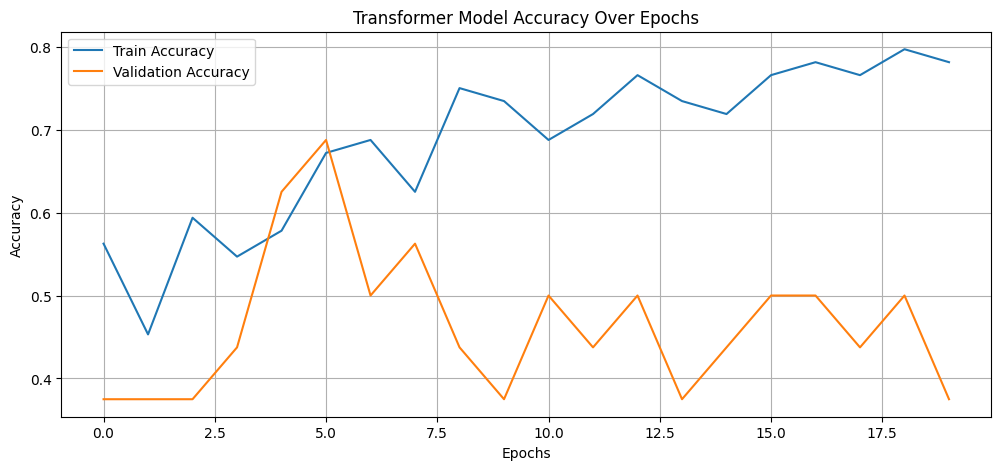

In [127]:


import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling1D, LayerNormalization, MultiHeadAttention
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Assume 'segments' (shape: samples, timesteps, features) and 'labels' (shape: samples,) are defined
# from your data loading and segmentation steps.

# If segments or labels are not defined, create placeholders for demonstration:
if 'segments' not in locals() or 'labels' not in locals():
    print("Warning: 'segments' or 'labels' not found. Creating placeholder data for demonstration.")
    num_samples = 200 # Increased samples for better training
    timesteps = 50
    features = 10
    segments = np.random.rand(num_samples, timesteps, features) # (samples, timesteps, features)
    # Example labels for 3 classes
    labels = ['ClassA'] * (num_samples // 3) + ['ClassB'] * (num_samples // 3) + ['ClassC'] * (num_samples - 2 * (num_samples // 3))
    np.random.shuffle(labels) # Shuffle labels
    print("Placeholder data created.")

# 1. Encode labels (if not already done)
le = LabelEncoder()
y_encoded = le.fit_transform(labels) # Integer labels (0, 1, 2, ...)

# 2. Train/test split
# Use stratify to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(
    segments, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# 3. Scale features - fit scaler on train only
# Scale each feature column independently across all timesteps
num_features = X_train.shape[2]
# Create a list of scalers for each feature dimension
feature_scalers = [StandardScaler() for _ in range(num_features)]

# Reshape data for scaling: (samples * timesteps, features)
X_train_reshaped = X_train.reshape(-1, num_features)
X_test_reshaped = X_test.reshape(-1, num_features)

# Apply scaling to the reshaped data
X_train_scaled_reshaped = feature_scalers[0].fit_transform(X_train_reshaped) # Fit and transform the whole reshaped array
X_test_scaled_reshaped = feature_scalers[0].transform(X_test_reshaped)

# Reshape back to (samples, timesteps, features)
X_train_scaled = X_train_scaled_reshaped.reshape(X_train.shape)
X_test_scaled = X_test_scaled_reshaped.reshape(X_test.shape)


# 4. Build the Transformer Model function
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Multi-head Self Attention
    x = LayerNormalization(epsilon=1e-6)(inputs) # Add LayerNorm before Attention
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = x + inputs # Residual connection

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res) # Add LayerNorm before FF
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(dropout)(x) # Add dropout after first dense in FF
    x = Dense(inputs.shape[-1])(x) # Output dimension should match input for residual
    x = Dropout(dropout)(x)

    return x + res # Residual connection


def build_transformer_model(input_shape, num_classes, head_size=128, num_heads=8, ff_dim=256, num_transformer_blocks=4, mlp_units=[256, 128], dropout=0.2):
    inputs = Input(shape=input_shape)

    x = inputs
    # Optional: Add Positional Encoding if your data order matters (which it does for time series)
    # from tensorflow.keras.layers import Add, Embedding
    # Assuming input is (timesteps, features)
    # x = inputs + PositionalEmbedding (need to implement or use)
    # Keras-nlp has positional embedding layers, but might add dependency.
    # Simple approach: Add learnable position embeddings or sinusoidal P.E.
    # For simplicity here, skipping explicit PE, but it's often crucial for Transformers.
    # A common approach is to add a `TokenAndPositionEmbedding` layer at the beginning.

    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = GlobalAveragePooling1D()(x) # Summarize sequence information
    for units in mlp_units:
        x = Dense(units, activation='relu')(x)
        x = Dropout(dropout)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Build the model
input_shape = X_train_scaled.shape[1:]  # (timesteps, features)
num_classes = len(le.classes_)

model_transformer = build_transformer_model(input_shape, num_classes)

# Compile with Adam optimizer and sparse_categorical_crossentropy for integer labels
optimizer_transformer = Adam(learning_rate=0.001)
model_transformer.compile(optimizer=optimizer_transformer,
                          loss='sparse_categorical_crossentropy', # Use sparse if labels are integers
                          metrics=['accuracy'])

model_transformer.summary()

# 5. Train with EarlyStopping and smaller batch size
early_stop_transformer = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True) # Increased patience

history_transformer = model_transformer.fit(
    X_train_scaled, y_train,
    validation_split=0.2, # Use a validation split from the training data
    epochs=200, # Increased epochs, relying on early stopping
    batch_size=32, # Adjusted batch size
    callbacks=[early_stop_transformer],
    verbose=1
)

# 6. Evaluate on test data
test_loss_transformer, test_acc_transformer = model_transformer.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\n✅ Transformer Model Test Accuracy: {test_acc_transformer * 100:.2f}%")

# Plotting Transformer history
plt.figure(figsize=(12, 5))
plt.plot(history_transformer.history['accuracy'], label='Train Accuracy')
plt.plot(history_transformer.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Transformer Model Accuracy Over Epochs")
plt.legend()
plt.grid(True)
plt.show()